<a href="https://colab.research.google.com/github/mmbs1989/TCC-PUCMINAS/blob/main/Notebook_TCC_PUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>PUC MG - Pontifícia Universidade Católica de Minas Gerais</center></h1>

<h2><center>Pós-Graduação em Ciência de Dados e Big Data</center></h2>

<h3><center>TRABALHO DE CONCLUSÃO DE CURSO</center><br>
TÍTULO: MODELOS PREDITIVOS DE VARIÁVEIS ECONÔMICAS UTILIZANDO SÉRIES TEMPORAIS<br>
<br>
ALUNO: Michel Muglia Barbosa Santos</h3>


In [ ]:
# Instalação da biblioteca PMDARIMA para utilizar a funcionalidade AUTO-ARIMA
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.7MB/s 
     |████████████████████████████████| 2.1MB 9.9MB/s 
     |████████████████████████████████| 9.5MB 28.5MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Bibliotecas básicas do python
import numpy as np 
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandas.util.testing import assert_frame_equal
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
import math

#Bibliotecas para utilização do Prophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

#Bibliotecas para utilização do ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
import pmdarima as pm
from pmdarima import auto_arima

#Bibliotecas para utilização do Keras
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import LSTM, SimpleRNN, Dense, Dropout, Masking, Embedding
from keras.preprocessing.sequence import TimeseriesGenerator

#Bibliotecas para utilização das métricas do Sklearn
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Bibliotecas para uso do statsmodels
import statsmodels.api as sm
from scipy import stats

#Biblioteca para ignorar os warnings
import warnings
warnings.filterwarnings("ignore")



## **CARREGAMENTO DOS DADOS**




In [ ]:
# Carregar os dados 
dftcc = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfarrec = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcca.csv")
dfpib = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccpib.csv")
dfimp = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcci.csv")
dfexp = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcce.csv")
dfdol = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdolar.csv")

In [ ]:
# Juntar as tabelas carregadas e definir os nomes das colunas
dftcc['arrec'] = dfarrec['a']
dftcc['pib'] = dfpib['pib']
dftcc['imp'] = dfimp['i']
dftcc['exp'] = dfexp['e']
dftcc['dolar'] = dfdol['dol']

dftcc.head()

,Data,arrec,pib,imp,exp,dolar
0,1994-01,4836,4563,1768675231,2747187653,0.1668
1,1994-02,4343,5793,2030100974,2778288879,0.2317
2,1994-03,4418,8520,2248937491,3350391558,0.3321
3,1994-04,5186,12829,2151981505,3634841763,0.4736
4,1994-05,4732,20504,2624852192,3862059965,0.6819


In [ ]:
dftcc.tail()

,Data,arrec,pib,import,export,dolar
315,2020-04,101154,543554,11610871137,17612476835,5.4858
316,2020-05,77415,560059,13390915390,17546386795,5.3361
317,2020-06,86258,605147,10449294354,17514983082,5.4661
318,2020-07,115990,631041,11508172753,19453592020,5.2240
319,2020-08,124505,629988,11132508190,17484221076,5.4914


In [ ]:
# Retirar as linhas que não serão utilizadas na análise
dftcc = dftcc.drop(dftcc.index[314:])
dftcc.tail()

,Data,arrec,pib,imp,exp,dolar
309,2019-10,135202,640907,17027283951,19576839231,4.0174
310,2019-11,125161,634654,14172102789,17736715198,4.2364
311,2019-12,147501,647460,12556086388,18502977191,4.0190
312,2020-01,174991,619785,16178224141,14494583508,4.2820
313,2020-02,116430,608644,13257290693,15582390653,4.4733


In [ ]:
# Transformar o tipo das colunas e definir o índice
dftcc['arrec'] = pd.to_numeric(dftcc['arrec'])
dftcc['pib'] = pd.to_numeric(dftcc['pib'])
dftcc['imp'] = pd.to_numeric(dftcc['imp'])
dftcc['exp'] = pd.to_numeric(dftcc['exp'])
dftcc['dolar'] = pd.to_numeric(dftcc['dolar'])
dftcc['Data'] = pd.to_datetime(dftcc['Data'])
dftcc.set_index('Data', inplace=True)

In [ ]:
dftcc.head()

,arrec,pib,imp,exp,dolar
Data,,,,,
1994-01-01,4836,4563,1768675231,2747187653,0.1668
1994-02-01,4343,5793,2030100974,2778288879,0.2317
1994-03-01,4418,8520,2248937491,3350391558,0.3321
1994-04-01,5186,12829,2151981505,3634841763,0.4736
1994-05-01,4732,20504,2624852192,3862059965,0.6819


In [ ]:
# Confirmar se há valores nulos
dftcc.isnull().sum()

arrec     0
pib       0
import    0
export    0
dolar     0
dtype: int64



## **ANÁLISE EXPLORATÓRIA DA ARRECADAÇÃO FEDERAL**




In [ ]:
# Estatística descritiva dos valores de arrecadação
dftcc['arrec'].describe().astype(int)

count       314
mean      54008
std       42247
min        4343
25%       15014
50%       45332
75%       91308
max      174991
Name: arrec, dtype: int64

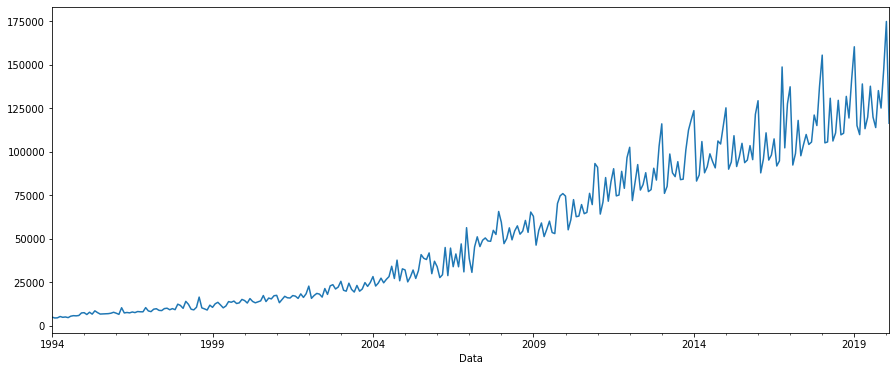

In [ ]:
# Gráfico dos valores
dftcc['arrec'].plot(figsize=(15,6))

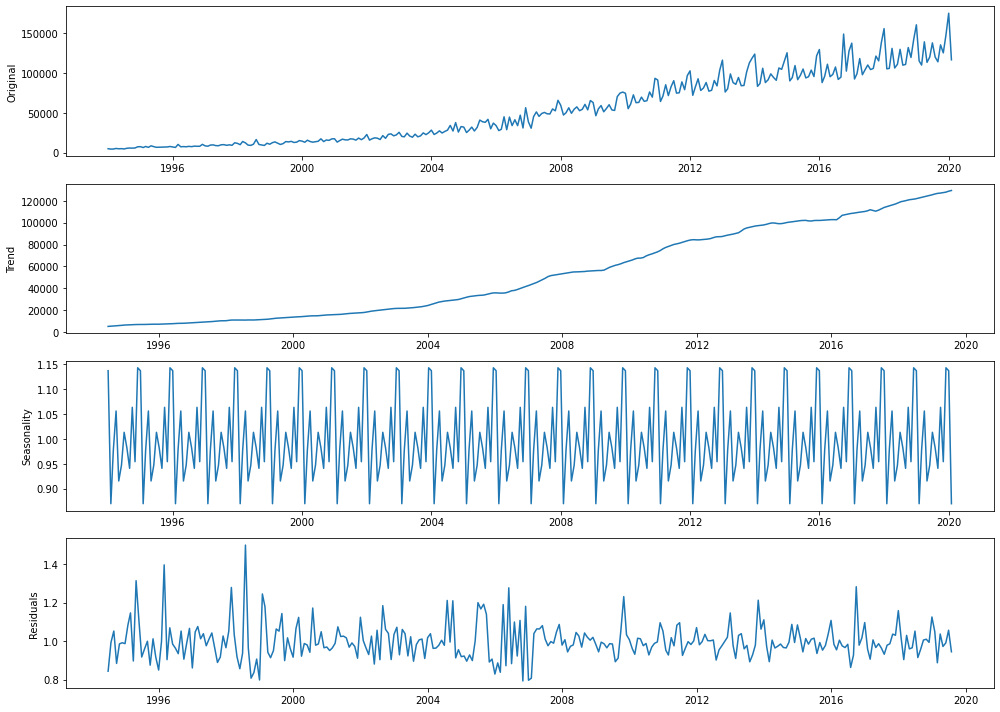

In [ ]:
#Decomposição da série temporal
decomposition = seasonal_decompose(dftcc['arrec'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(dftcc['arrec'])
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()



## **ANÁLISE EXPLORATÓRIA DO PIB**




In [ ]:
# Estatística descritiva dos valores do PIB
dftcc['pib'].describe().astype(int)

count       314
mean     269371
std      184225
min        4563
25%      101859
50%      216359
75%      448483
max      647460
Name: pib, dtype: int64

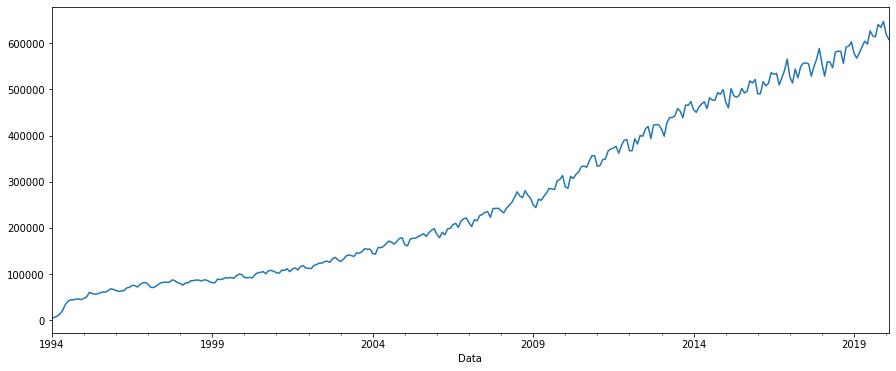

In [ ]:
# Gráfico dos valores do PIB
dftcc['pib'].plot(figsize=(15,6))

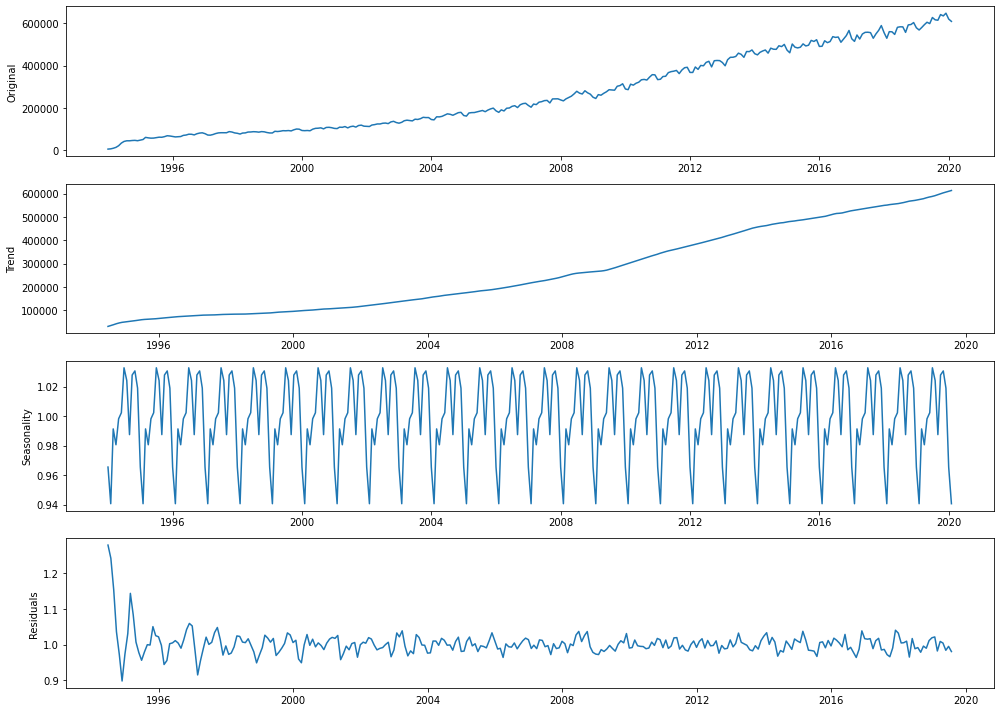

In [ ]:
#Decomposição da série temporal
decomposition = seasonal_decompose(dftcc['pib'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(dftcc['pib'])
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()



## **ANÁLISE EXPLORATÓRIA DAS IMPORTAÇÕES**




In [ ]:
# Estatística descritiva dos valores de importação
dftcc['imp'].describe().astype(int)

count            314
mean      9892422722
std       5810018770
min       1768675231
25%       4618010995
50%       8533476810
75%      14601529610
max      23049601170
Name: imp, dtype: int64

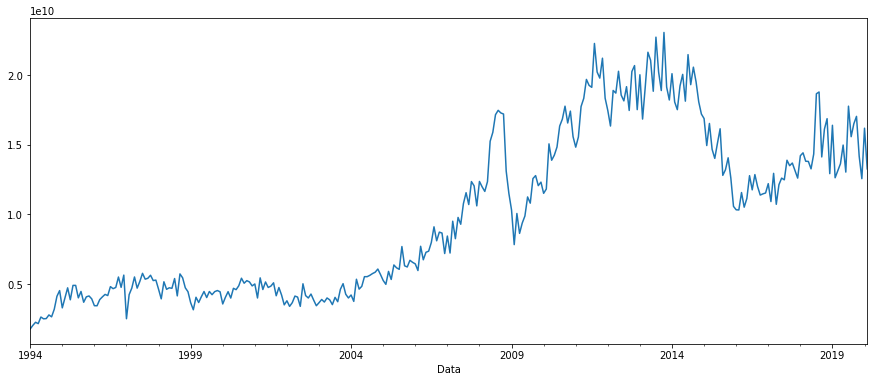

In [ ]:
# Gráfico dos valores de importações
dftcc['imp'].plot(figsize=(15,6))

Text(0, 0.5, 'Dólar')

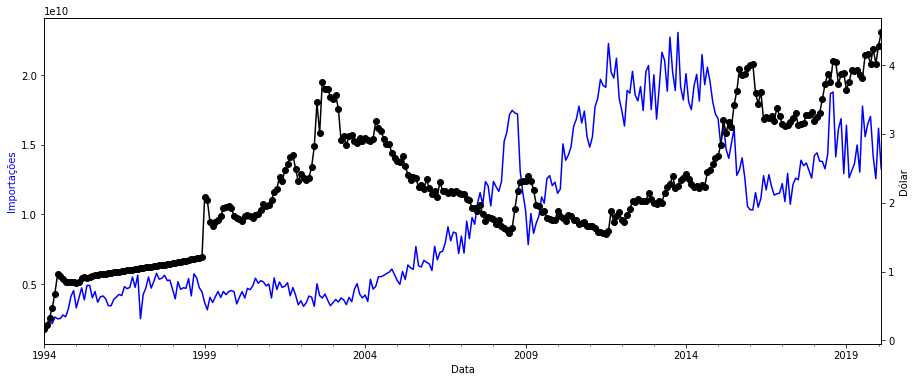

In [ ]:
# Comparação das importações com o dólar
ax1 = dftcc['imp'].plot(x = 'Data', y='imp', kind = 'line', color = 'b', figsize=(15,6))
ax1.set_ylabel('Importações', color = 'b')
ax2 = dftcc['dolar'].plot(secondary_y = True, color = 'k', marker = 'o')
ax2.set_ylabel('Dólar', color = 'k')


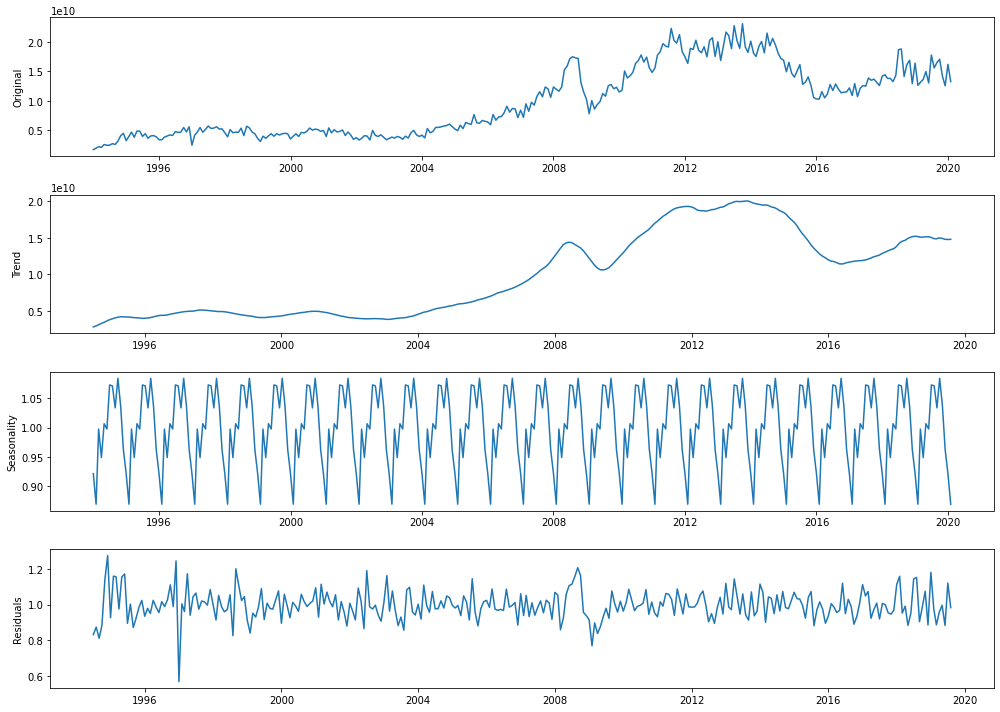

In [ ]:
#Decomposição da série temporal
decomposition = seasonal_decompose(dftcc['imp'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(dftcc['imp'])
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

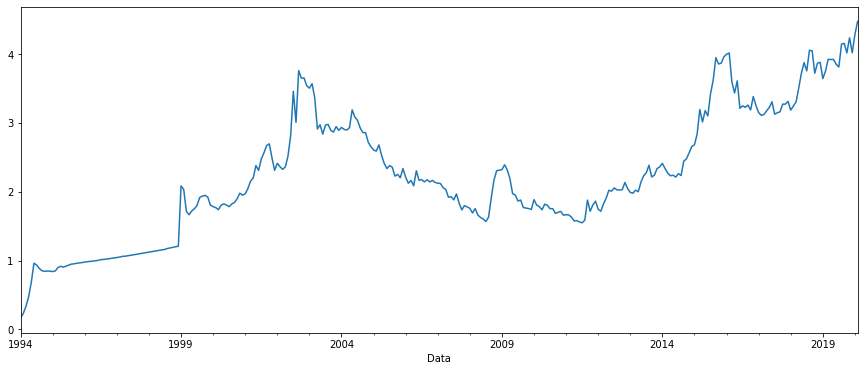

In [ ]:
# Gráfico dos valores do dólar
dftcc['dolar'].plot(figsize=(15,6))

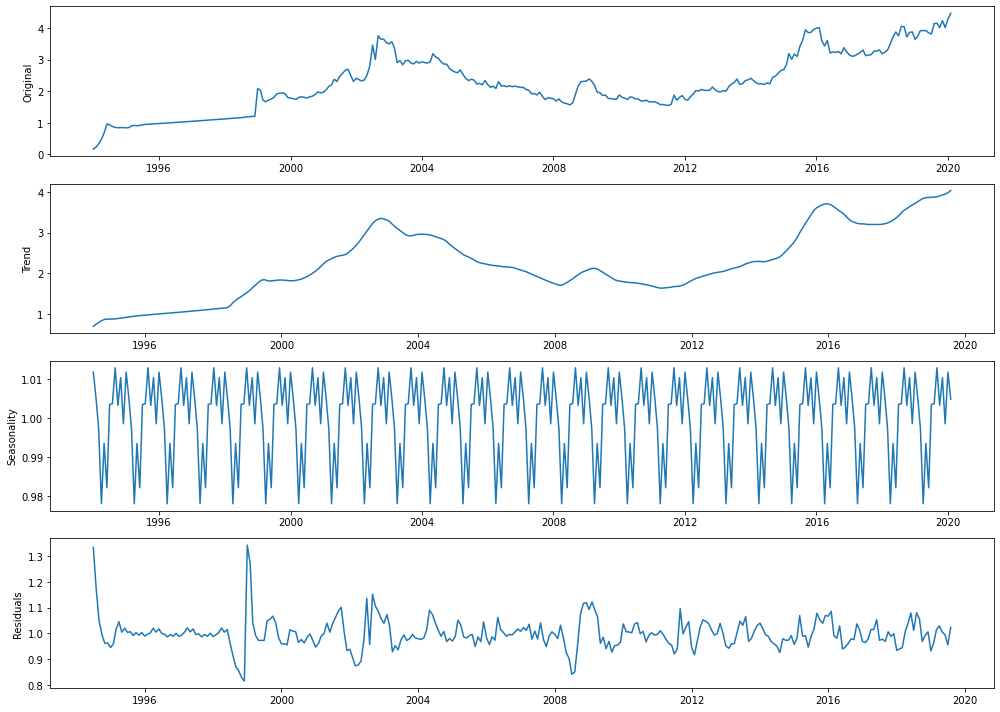

In [ ]:
#Decomposição da série temporal
decomposition = seasonal_decompose(dftcc['dolar'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(dftcc['dolar'])
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [ ]:
# Análise da correlação
correl = dftcc.corr()
print(correl)

          arrec       pib       imp       exp     dolar
arrec  1.000000  0.976627  0.824906  0.867673  0.643870
pib    0.976627  1.000000  0.823582  0.882453  0.690871
imp    0.824906  0.823582  1.000000  0.948860  0.302492
exp    0.867673  0.882453  0.948860  1.000000  0.439972
dolar  0.643870  0.690871  0.302492  0.439972  1.000000




## **ANÁLISE EXPLORATÓRIA DAS EXPORTAÇÕES**




In [ ]:
# Estatística descritiva dos valores de exportações
dftcc['exp'].describe().astype(int)

count            314
mean     11642469810
std       6617465613
min       2747187653
25%       4632933982
50%      11846627371
75%      17681900227
max      26148242211
Name: exp, dtype: int64

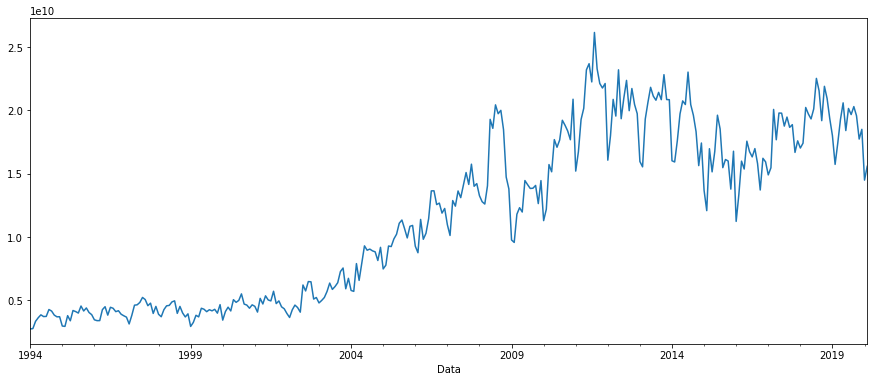

In [ ]:
# Gráfico dos valores
dftcc['exp'].plot(figsize=(15,6))

Text(0, 0.5, 'Dólar')

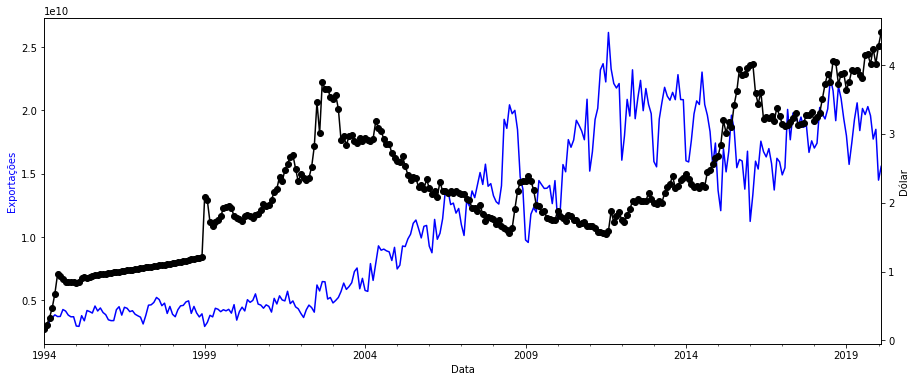

In [ ]:
# Comparação das exportações com o dólar
ax1 = dftcc['exp'].plot(x = 'Data', y='exp', kind = 'line', color = 'b', figsize=(15,6))
ax1.set_ylabel('Exportações', color = 'b')
ax2 = dftcc['dolar'].plot(secondary_y = True, color = 'k', marker = 'o')
ax2.set_ylabel('Dólar', color = 'k')

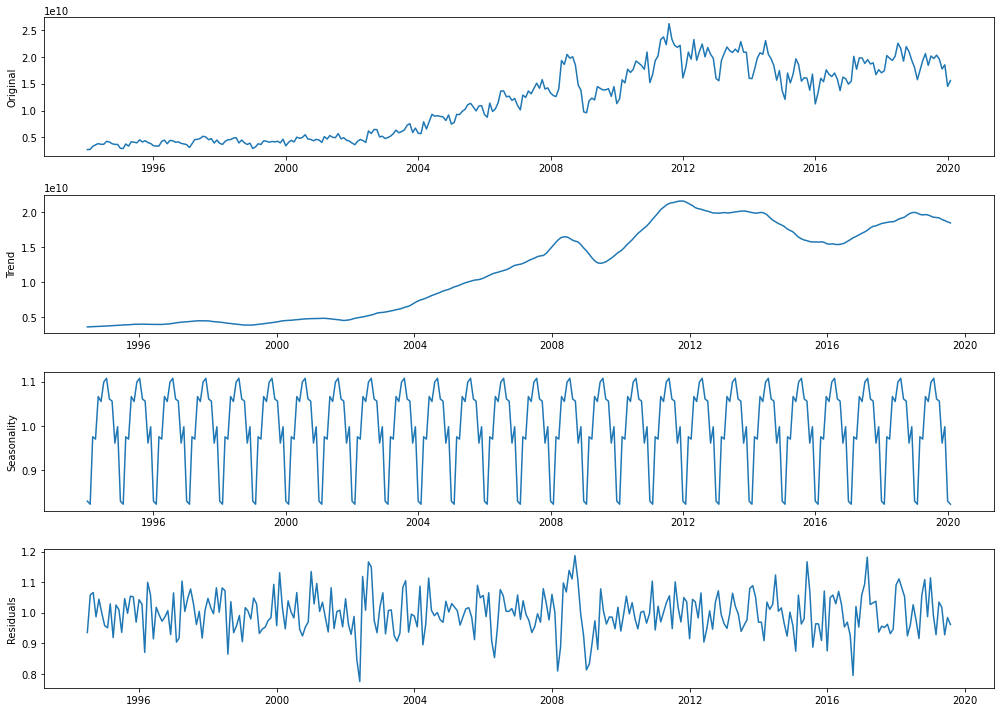

In [ ]:
#Decomposição da série temporal
decomposition = seasonal_decompose(dftcc['exp'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(dftcc['exp'])
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [ ]:
# Análise da correlação
correl = dftcc.corr()
print(correl)

          arrec       pib       imp       exp     dolar
arrec  1.000000  0.976627  0.824906  0.867673  0.643870
pib    0.976627  1.000000  0.823582  0.882453  0.690871
imp    0.824906  0.823582  1.000000  0.948860  0.302492
exp    0.867673  0.882453  0.948860  1.000000  0.439972
dolar  0.643870  0.690871  0.302492  0.439972  1.000000


## **MODELOS PREDITIVOS DA ARRECADAÇÃO FEDERAL**

## Modelo preditivo ARIMA

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfarrec_train_arima = pd.DataFrame(dftcc['arrec'].iloc[:-14]) 
dfarrec_test_arima =  pd.DataFrame(dftcc['arrec'].iloc[-14:])
dfarrec_test_arima.head()

,arrec
Data,
2019-01-01,160426
2019-02-01,115062
2019-03-01,109854
2019-04-01,139030
2019-05-01,113278


In [ ]:
# Utilização do auto-arima para identificar o melhor modelo de forma automática
modeloARIMAARREC = auto_arima(dfarrec_train_arima['arrec'], test='adf', trace=True, seasonal= True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6435.374, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6087.001, Time=0.64 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6239.498, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6433.862, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6389.975, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6069.247, Time=1.18 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=6284.242, Time=0.15 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=6036.571, Time=3.55 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.66 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=6043.259, Time=3.12 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=6114.465, Time=3.15 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=6045.667, Time=5.35 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept

In [ ]:
print(modeloARIMAARREC.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2973.555
Date:                            Wed, 17 Mar 2021   AIC                           5959.110
Time:                                    00:31:22   BIC                           5981.312
Sample:                                         0   HQIC                          5967.996
                                            - 300                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0668      0.054      1.242      0.214      -0.039       0.172
ar.L2          0.0437      0.072   

In [ ]:
# Treinamento do modelo
modeloARIMAARREC.fit(dfarrec_train_arima['arrec'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
#Faz a predição 
forecast_ARIMAARREC = modeloARIMAARREC.predict(n_periods=len(dfarrec_test_arima['arrec']))
forecast_ARIMAARREC = pd.DataFrame(forecast_ARIMAARREC, index = dfarrec_test_arima.index,columns=['Prediction'])
conf_int = modeloARIMAARREC.predict(len(dfarrec_test_arima['arrec']), return_conf_int=True, alpha = 0.05) #Pega o intervalo de confiança

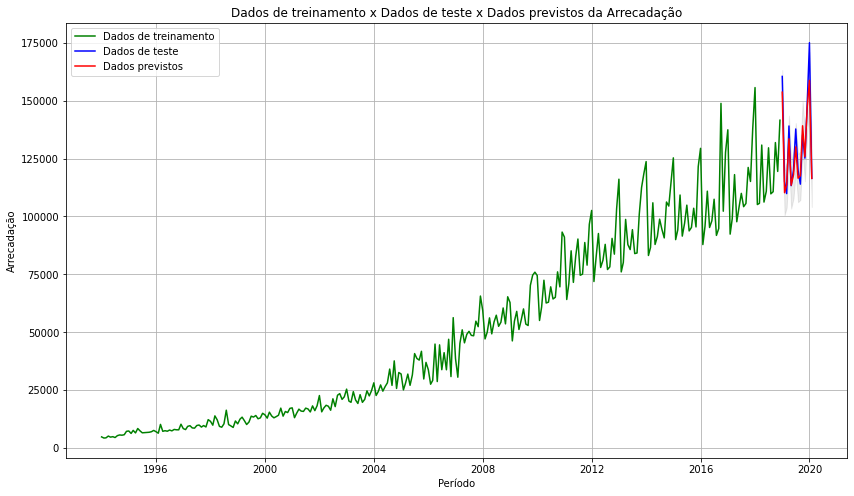

In [ ]:
#Plotagem dos dados de treinamento, teste e previsão
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos da Arrecadação')
plt.plot(dfarrec_train_arima['arrec'], color='green', label = 'Dados de treinamento')
plt.plot(dfarrec_test_arima['arrec'], color = 'blue', label = 'Dados de teste')
plt.fill_between(dfarrec_test_arima.index, conf_int[1][:,0], conf_int[1][:,1], 
                 color='k', alpha=.08)
plt.plot(forecast_ARIMAARREC['Prediction'], color = 'red', label = 'Dados previstos')
plt.xlabel('Período')
plt.ylabel('Arrecadação')
plt.legend()
plt.grid(True)
plt.show()

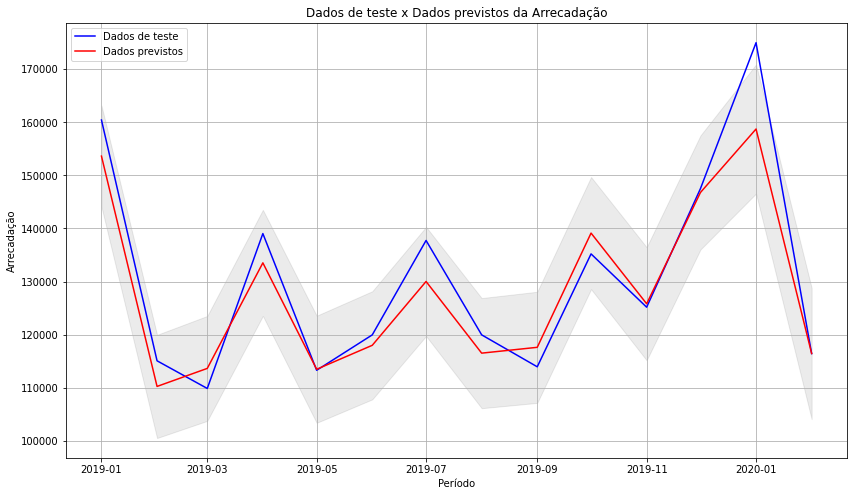

In [ ]:
#Plotagem dos dados de teste e previsão
plt.figure(figsize=(14,8))
plt.title('Dados de teste x Dados previstos da Arrecadação')
plt.plot(dfarrec_test_arima['arrec'], color = 'blue', label = 'Dados de teste')
plt.fill_between(dfarrec_test_arima.index, conf_int[1][:,0], conf_int[1][:,1], 
                 color='k', alpha=.08)
plt.plot(forecast_ARIMAARREC['Prediction'], color = 'red', label = 'Dados previstos')
plt.xlabel('Período')
plt.ylabel('Arrecadação')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAEARIMAARREC = int(mean_absolute_error(dfarrec_test_arima['arrec'], forecast_ARIMAARREC['Prediction']))
MSEARIMAARREC = int(mean_squared_error(dfarrec_test_arima['arrec'], forecast_ARIMAARREC['Prediction']))
RMSEARIMAARREC = int(math.sqrt(mean_squared_error(dfarrec_test_arima['arrec'], forecast_ARIMAARREC['Prediction'])))

print('MSE: '+str(MSEARIMAARREC))
print('MAE: '+str(MAEARIMAARREC))
print('RMSE: '+str(RMSEARIMAARREC))

MSE: 34573565
MAE: 4248
RMSE: 5879


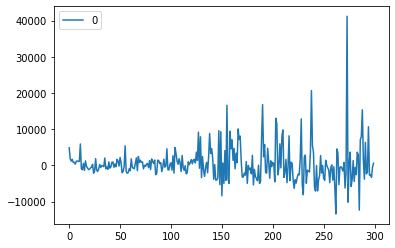

In [ ]:
#Plotagem dos resíduos
residuals = pd.DataFrame(modeloARIMAARREC.resid())
residuals.plot()

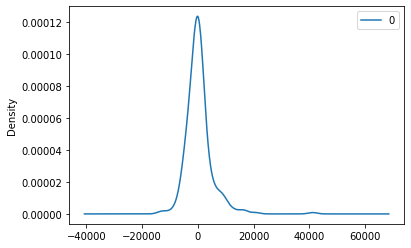

                  0
count    300.000000
mean     384.606592
std     4870.195929
min   -13429.432156
25%    -2021.885744
50%     -182.383249
75%     1600.780196
max    41177.794807


In [ ]:
#Plotagem da densidade dos resíduos
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Modelo Preditivo LSTM

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfarrec_train_lstm = pd.DataFrame(dftcc['arrec'].iloc[:-14])  
dfarrec_test_lstm =  pd.DataFrame(dftcc['arrec'].iloc[-14:])
dfarrec_test_lstm.head()

,arrec
Data,
2019-01-01,160426
2019-02-01,115062
2019-03-01,109854
2019-04-01,139030
2019-05-01,113278


In [ ]:
#Normalização dos dados
scaler = MinMaxScaler()
train_lstm = dfarrec_train_lstm.iloc[:,0:1].values
test_lstm = dfarrec_test_lstm.iloc[:,0:1].values
scaler.fit(train_lstm)
scaled_train_data = scaler.transform(train_lstm)
scaled_test_data = scaler.transform(test_lstm)

In [ ]:
# Gerar um objeto de série temporal

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
#Criação da LSTM utilizando a biblioteca Keras

lstm_model = Sequential()
lstm_model.add(LSTM(300, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               362400    
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=300)

Epoch 1/300
288/288 [==============================] - 6s 16ms/step - loss: 0.0343
Epoch 2/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0087
Epoch 3/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0036
Epoch 4/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0055
Epoch 5/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0048
Epoch 6/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0053
Epoch 7/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0050
Epoch 8/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0031
Epoch 9/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0040
Epoch 10/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0045
Epoch 11/300
288/288 [==============================] - 5s 17ms/step - loss: 0.0034
Epoch 12/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0027
E

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_lstm)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

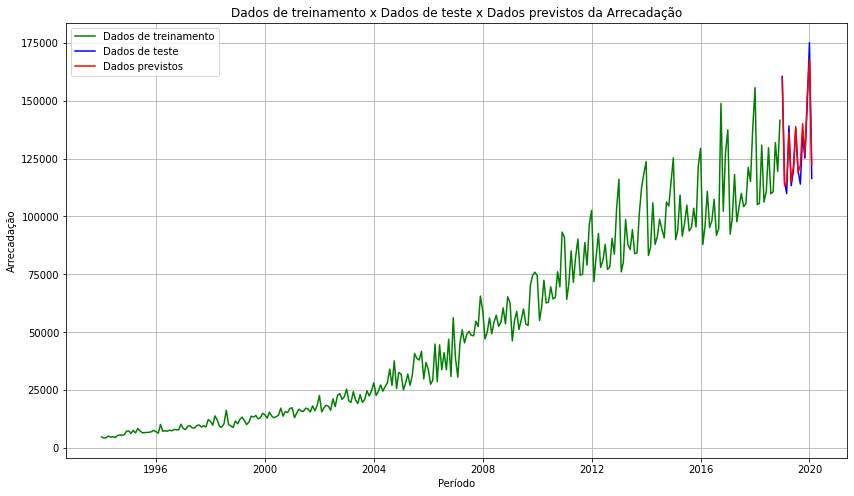

In [ ]:
#Plotagem dos dados de treinamento, teste e previsão
plt.figure(figsize=(14,8))
plt.plot(dfarrec_train_lstm.index, dfarrec_train_lstm, color='green', label = 'Dados de treinamento')
plt.plot(dfarrec_test_lstm.index, dfarrec_test_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(dfarrec_test_lstm.index, lstm_predictions, color = 'red', label = 'Dados previstos')
plt.title('Dados de treinamento x Dados de teste x Dados previstos da Arrecadação')
plt.xlabel('Período')
plt.ylabel('Arrecadação')
plt.legend()
plt.grid(True)
plt.show()

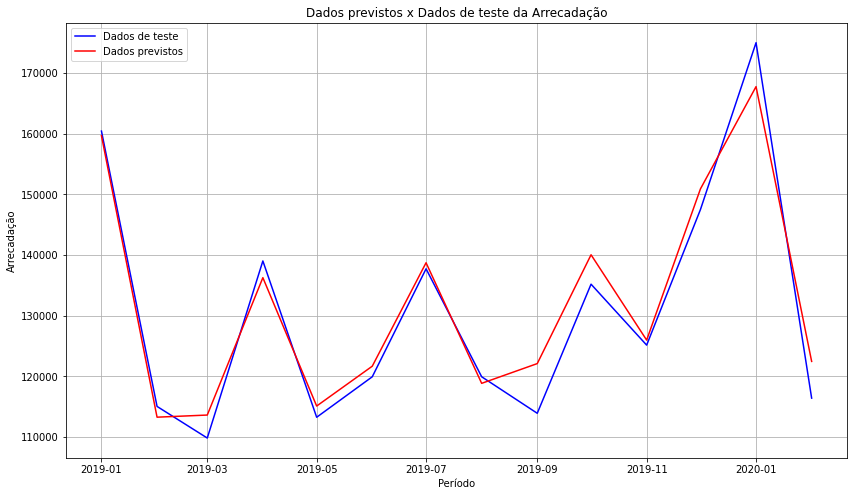

In [ ]:
#Plotagem dos dados de teste e dados previstos
plt.figure(figsize=(14,8))
plt.plot(dfarrec_test_lstm.index, test_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(dfarrec_test_lstm.index, lstm_predictions, color = 'red', label = 'Dados previstos')
plt.title('Dados previstos x Dados de teste da Arrecadação')
plt.xlabel('Período')
plt.ylabel('Arrecadação')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAELSTMARREC = int(mean_absolute_error(dfarrec_test_lstm,lstm_predictions))
MSELSTMARREC = int(mean_squared_error(dfarrec_test_lstm,lstm_predictions))
RMSELSTMARREC = int(np.sqrt(mean_squared_error(dfarrec_test_lstm,lstm_predictions)))

print('MSE: '+str(MSELSTMARREC))
print('MAE: '+str(MAELSTMARREC))
print('RMSE: '+str(RMSELSTMARREC))

MSE: 16145662
MAE: 3235
RMSE: 4018


## Modelo Preditivo PROPHET

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfarrec_train_prophet = pd.DataFrame(dftcc['arrec'].iloc[:-14])
dfarrec_test_prophet =  pd.DataFrame(dftcc['arrec'].iloc[-14:])
dfarrec_test_prophet.head()

,arrec
Data,
2019-01-01,160426
2019-02-01,115062
2019-03-01,109854
2019-04-01,139030
2019-05-01,113278


In [ ]:
#Renomeia as colunas 'arrec' para 'y' e 'Data' para 'ds' do conjunto de treinamento e teste
dfarrec_train_prophet = pd.DataFrame({"ds": dfarrec_train_prophet.index, "y": dfarrec_train_prophet.arrec})
dfarrec_train_prophet.reset_index(drop = True, inplace = True)
dfarrec_test_prophet = pd.DataFrame({"ds_test": dfarrec_test_prophet.index, "y_test": dfarrec_test_prophet.arrec})
dfarrec_test_prophet.reset_index(drop = True, inplace = True)

In [ ]:
dfarrec_test_prophet.head()

,ds_test,y_test
0,2019-01-01,160426
1,2019-02-01,115062
2,2019-03-01,109854
3,2019-04-01,139030
4,2019-05-01,113278


In [ ]:
#Utiliza a biblioteca Prophet para fazer a previsão
prophet_model = Prophet()
prophet_model.fit(dfarrec_train_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(41.125, 0.5, 'Arrecadação')

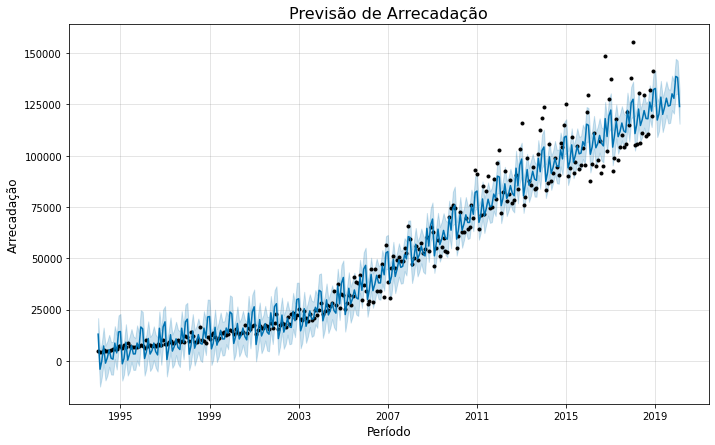

In [ ]:
#Cria datas futuras e faz a predição
prophet_forecast = prophet_model.make_future_dataframe(periods=14, freq='MS')
prophet_forecast = prophet_model.predict(prophet_forecast)

#Plotagem do gráfico de previsão
fig = prophet_model.plot(prophet_forecast)
ax1 = fig.gca()
ax1.set_title("Previsão de Arrecadação", fontsize=16)
ax1.set_xlabel("Período", fontsize=12)
ax1.set_ylabel("Arrecadação", fontsize=12)

In [ ]:
#Seleciona os dados previstos apenas para o período de teste
prophet_forecast = prophet_forecast[prophet_forecast['ds'] > '2018-12-01']
prophet_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
300,2019-01-01,124356.240643,124801.923651,141491.497907,124356.240643,124356.240643,8478.847872,8478.847872,8478.847872,8478.847872,8478.847872,8478.847872,0.0,0.0,0.0,132835.088516
301,2019-02-01,124850.303486,109104.834450,126349.295056,124850.303486,124850.303486,-7454.965244,-7454.965244,-7454.965244,-7454.965244,-7454.965244,-7454.965244,0.0,0.0,0.0,117395.338242
302,2019-03-01,125296.553796,111912.057459,128391.167962,125294.372278,125302.957816,-4934.730676,-4934.730676,-4934.730676,-4934.730676,-4934.730676,-4934.730676,0.0,0.0,0.0,120361.823119
303,2019-04-01,125790.616638,120259.448244,136507.473893,125776.658311,125809.589962,2787.469141,2787.469141,2787.469141,2787.469141,2787.469141,2787.469141,0.0,0.0,0.0,128578.085779
304,2019-05-01,126268.741970,111512.399863,128325.843262,126240.130226,126302.820972,-6115.813858,-6115.813858,-6115.813858,-6115.813858,-6115.813858,-6115.813858,0.0,0.0,0.0,120152.928112


In [ ]:
#Escolhe as datas ('ds' e 'ds_test') como índices
prophet_forecast.set_index(prophet_forecast['ds'], inplace=True) 
dfarrec_test_prophet.set_index(dfarrec_test_prophet['ds_test'], inplace=True) 
dfarrec_train_prophet.set_index(dfarrec_train_prophet['ds'], inplace=True) 

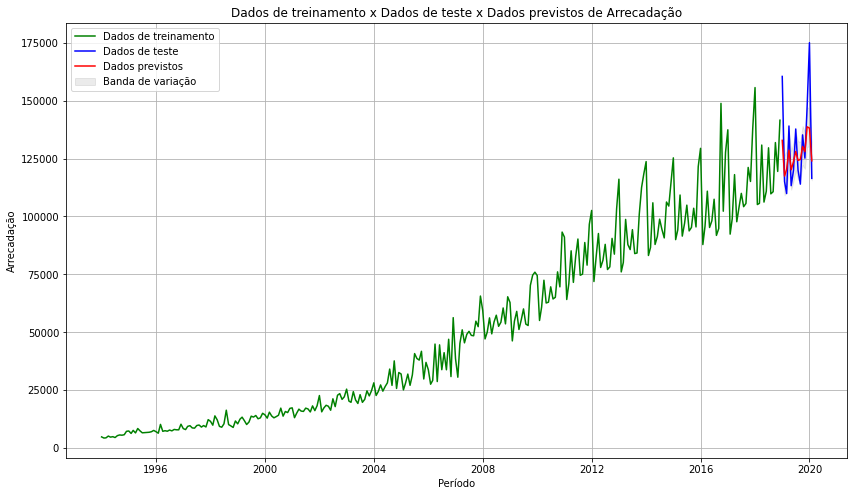

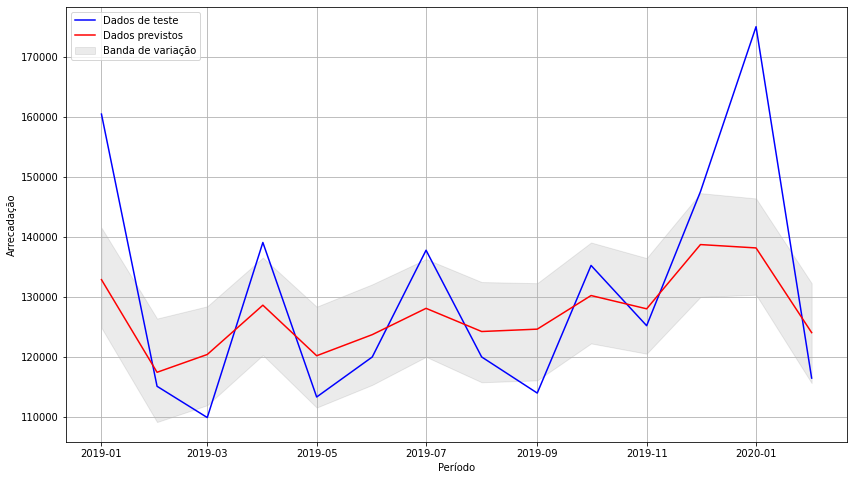

In [ ]:
#Plotagem do comparativo entre o preço previsto e o dataset
n = dfarrec_train_prophet.shape[0]
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos de Arrecadação')
plt.plot(dfarrec_train_prophet['y'], 'green', label='Dados de treinamento')
plt.plot(dfarrec_test_prophet['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'][-n:], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Arrecadação")
plt.legend()
plt.grid(True)

#Plotagem do comparativo entre os valores originais com os previstos
plt.figure(figsize=(14,8))
plt.plot(dfarrec_test_prophet['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Arrecadação")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAEPROPHETARREC =  int(mean_absolute_error(dfarrec_test_prophet['y_test'],prophet_forecast['yhat']))
MSEPROPHETARREC = int(mean_squared_error(dfarrec_test_prophet['y_test'],prophet_forecast['yhat']))
RMSEPROPHETARREC = int(np.sqrt(mean_squared_error(dfarrec_test_prophet['y_test'],prophet_forecast['yhat'])))

print('MSE: '+str(MSEPROPHETARREC))
print('MAE: '+str(MAEPROPHETARREC))
print('RMSE: '+str(RMSEPROPHETARREC))

MSE: 200026457
MAE: 10510
RMSE: 14143


## Comparativo entre os modelos

In [ ]:
#Criar dataframe de comparação entre os modelos
dfarrec_comparativo = dfarrec_test_arima.copy()
dfarrec_comparativo['PREVISÃO_ARIMA'] = forecast_ARIMAARREC['Prediction']
dfarrec_comparativo['PREVISÃO_PROPHET'] = prophet_forecast['yhat']
dfarrec_comparativo['PREVISÃO_LSTM'] = lstm_predictions
dfarrec_comparativo.head(14)

,arrec,PREVISÃO_ARIMA,PREVISÃO_PROPHET,PREVISÃO_LSTM
Data,,,,
2019-01-01,160426,153621.014229,132835.088516,159669.793979
2019-02-01,115062,110234.837646,117395.338242,113289.577076
2019-03-01,109854,113630.404791,120361.823119,113640.509073
2019-04-01,139030,133512.974041,128578.085779,136275.631916
2019-05-01,113278,113467.029556,120152.928112,115124.450090
2019-06-01,119946,117982.344141,123669.021680,121690.349889
2019-07-01,137735,130008.420615,128052.490465,138733.959247
2019-08-01,119951,116505.884958,124190.784839,118865.329278
2019-09-01,113933,117603.079125,124583.851815,122119.078425


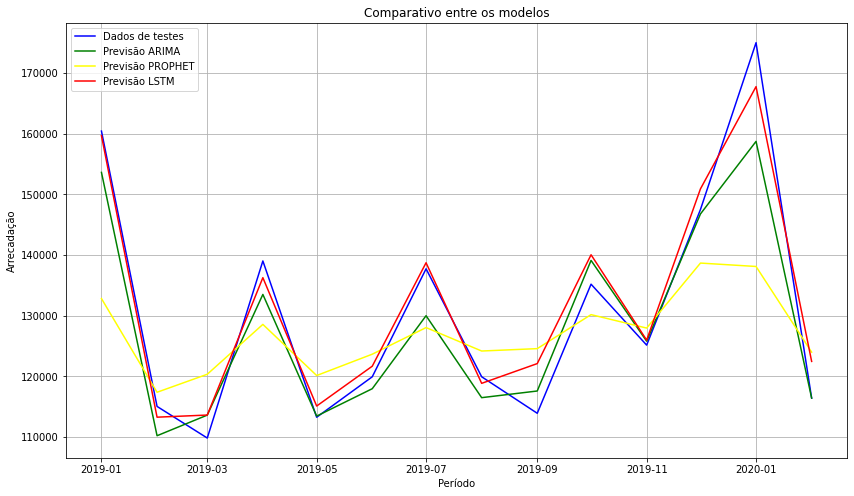

In [ ]:
# Plotagem do comparativo entre os modelos
plt.figure(figsize=(14,8))
plt.plot(dfarrec_comparativo.index, dfarrec_comparativo["arrec"], color='blue', label = 'Dados de testes')
plt.plot(dfarrec_comparativo.index, dfarrec_comparativo["PREVISÃO_ARIMA"], color = 'green', label = 'Previsão ARIMA')
plt.plot(dfarrec_comparativo.index, dfarrec_comparativo["PREVISÃO_PROPHET"], color = 'yellow', label = 'Previsão PROPHET')
plt.plot(dfarrec_comparativo.index, dfarrec_comparativo["PREVISÃO_LSTM"], color = 'red', label = 'Previsão LSTM')
plt.title('Comparativo entre os modelos')
plt.xlabel('Período')
plt.ylabel('Arrecadação')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#Comparativo dos erros
dfarrec_erro = pd.DataFrame({"Modelos" : ["ARIMA", "LSTM", "Prophet"]})
dfarrec_erro['MAE'] = [MAEARIMAARREC, MAELSTMARREC, MAEPROPHETARREC]
dfarrec_erro['MSE'] = [MSEARIMAARREC, MSELSTMARREC, MSEPROPHETARREC]
dfarrec_erro['RMSE'] = [RMSEARIMAARREC, RMSELSTMARREC, RMSEPROPHETARREC]
dfarrec_erro = dfarrec_erro.sort_values('MAE')
dfarrec_erro.set_index('Modelos', inplace=True)
dfarrec_erro.head()

,MAE,MSE,RMSE
Modelos,,,
LSTM,3235,16145662,4018
ARIMA,4248,34573565,5879
Prophet,10510,200026457,14143


## **MODELOS PREDITIVOS DO PIB**







## Modelo preditivo ARIMA

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfpib_train_arima = pd.DataFrame(dftcc['pib'].iloc[:-14])
dfpib_test_arima =  pd.DataFrame(dftcc['pib'].iloc[-14:])
dfpib_test_arima

,pib
Data,
2019-01-01,578453
2019-02-01,567985
2019-03-01,579173
2019-04-01,592916
2019-05-01,604607
2019-06-01,598283
2019-07-01,627050
2019-08-01,616158
2019-09-01,614188


In [ ]:
# Utilização do auto-arima para identificar o melhor modelo de forma automática
modelARIMAPIB = auto_arima(dfpib_train_arima['pib'], test='adf', trace=True, seasonal= True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6236.065, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6421.949, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6165.243, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6279.806, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6429.546, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6408.128, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=6257.408, Time=0.64 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6259.239, Time=0.50 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=6295.808, Time=0.17 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=4.66 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6199.300, Time=0.57 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=6148.609, Time=1.00 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=6378.532, Time=0.06 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=6238.716, Time=0.91 sec
 ARIMA(2,1,0)(1,0,1)[12]

In [ ]:
print(modelARIMAPIB.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -3069.304
Date:                            Thu, 18 Mar 2021   AIC                           6148.609
Time:                                    00:19:22   BIC                           6167.111
Sample:                                         0   HQIC                          6156.014
                                            - 300                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1602.7314    377.179      4.249      0.000     863.474    2341.989
ar.L1         -0.4427      0.037   

In [ ]:
# Treinamento do modelo
modelARIMAPIB.fit(dfpib_train_arima['pib'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
#Faz a predição 
forecast_arima = modelARIMAPIB.predict(n_periods=len(dfpib_test_arima['pib']))
forecast_arima = pd.DataFrame(forecast_arima, index = dfpib_test_arima.index,columns=['Prediction'])
conf_int = modelARIMAPIB.predict(len(dfpib_test_arima['pib']), return_conf_int=True, alpha = 0.05) #Pega o intervalo de confiança

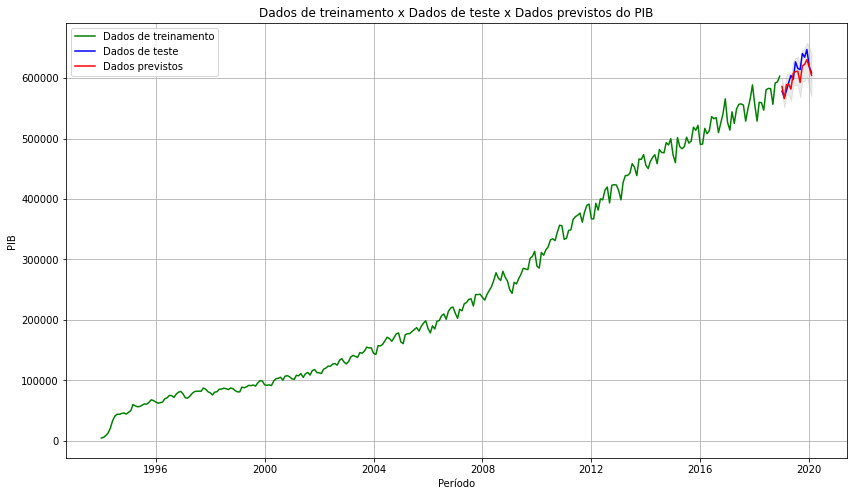

In [ ]:
#Plotagem dos dados de treinamento, teste e previsão
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos do PIB')
plt.plot(dfpib_train_arima['pib'], color='green', label = 'Dados de treinamento')
plt.plot(dfpib_test_arima['pib'], color = 'blue', label = 'Dados de teste')
plt.fill_between(dfpib_test_arima.index, conf_int[1][:,0], conf_int[1][:,1], 
                 color='k', alpha=.08)
plt.plot(forecast_arima['Prediction'], color = 'red', label = 'Dados previstos')
plt.xlabel('Período')
plt.ylabel('PIB')
plt.legend()
plt.grid(True)
plt.show()

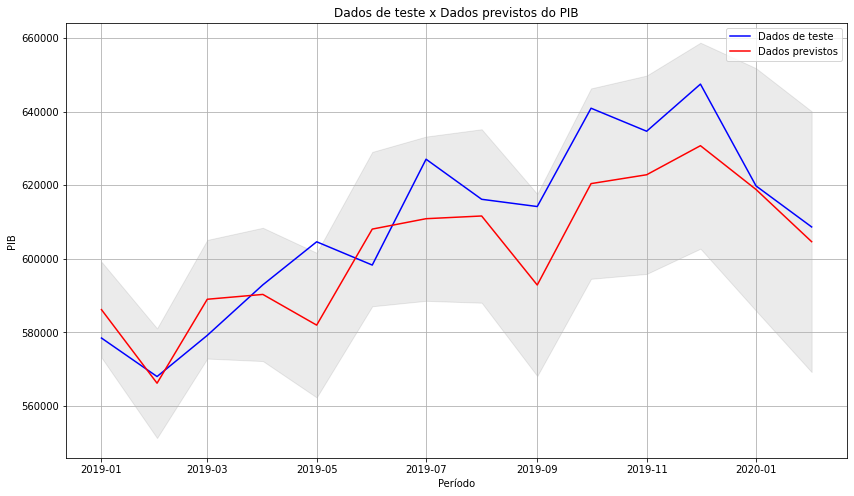

In [ ]:
#Plotagem dos dados de teste e previsão
plt.figure(figsize=(14,8))
plt.title('Dados de teste x Dados previstos do PIB')
plt.plot(dfpib_test_arima['pib'], color = 'blue', label = 'Dados de teste')
plt.fill_between(dfpib_test_arima.index, conf_int[1][:,0], conf_int[1][:,1], 
                 color='k', alpha=.08)
plt.plot(forecast_arima['Prediction'], color = 'red', label = 'Dados previstos')
plt.xlabel('Período')
plt.ylabel('PIB')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAEARIMAPIB = int(mean_absolute_error(dfpib_test_arima['pib'], forecast_arima['Prediction']))
MSEARIMAPIB = int(mean_squared_error(dfpib_test_arima['pib'], forecast_arima['Prediction']))
RMSEARIMAPIB = int(math.sqrt(mean_squared_error(dfpib_test_arima['pib'], forecast_arima['Prediction'])))


print('MSE: '+str(MSEARIMAPIB))
print('MAE: '+str(MAEARIMAPIB))
print('RMSE: '+str(RMSEARIMAPIB))

MSE: 169126237
MAE: 10744
RMSE: 13004


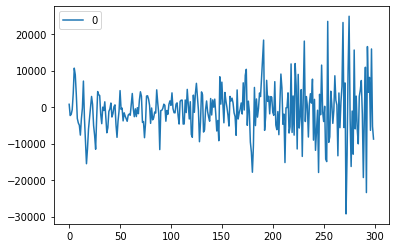

In [ ]:
#Plotagem dos resíduos
residuals = pd.DataFrame(modelARIMAPIB.resid())
residuals.plot()

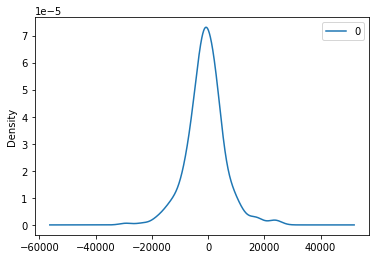

                  0
count    300.000000
mean    -852.672933
std     6828.185400
min   -29266.096407
25%    -4324.909127
50%     -941.528741
75%     2865.236184
max    24867.346500


In [ ]:
#Plotagem da densidade dos resíduos
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Modelo Preditivo LSTM

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfpib_train_lstm = pd.DataFrame(dftcc['pib'].iloc[:-14]) 
dfpib_test_lstm =  pd.DataFrame(dftcc['pib'].iloc[-14:])
dfpib_test_lstm

,pib
Data,
2019-01-01,578453
2019-02-01,567985
2019-03-01,579173
2019-04-01,592916
2019-05-01,604607
2019-06-01,598283
2019-07-01,627050
2019-08-01,616158
2019-09-01,614188


In [ ]:
#Normalização dos dados
scaler = MinMaxScaler()
train_lstm = dfpib_train_lstm.iloc[:,0:1].values
test_lstm = dfpib_test_lstm.iloc[:,0:1].values
scaler.fit(train_lstm)
scaled_train_data = scaler.transform(train_lstm)
scaled_test_data = scaler.transform(test_lstm)

In [ ]:
# Gerar um objeto de série temporal

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
#Criação da LSTM utilizando a biblioteca Keras

lstm_model = Sequential()
lstm_model.add(LSTM(300, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               362400    
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=300)

Epoch 1/300
288/288 [==============================] - 6s 15ms/step - loss: 0.0223
Epoch 2/300
288/288 [==============================] - 4s 15ms/step - loss: 0.0010
Epoch 3/300
288/288 [==============================] - 4s 16ms/step - loss: 9.9020e-04
Epoch 4/300
288/288 [==============================] - 4s 15ms/step - loss: 0.0011
Epoch 5/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0014
Epoch 6/300
288/288 [==============================] - 4s 15ms/step - loss: 8.4378e-04
Epoch 7/300
288/288 [==============================] - 4s 16ms/step - loss: 0.0020
Epoch 8/300
288/288 [==============================] - 4s 15ms/step - loss: 7.6921e-04
Epoch 9/300
288/288 [==============================] - 4s 15ms/step - loss: 7.2440e-04
Epoch 10/300
288/288 [==============================] - 4s 15ms/step - loss: 6.7013e-04
Epoch 11/300
288/288 [==============================] - 4s 15ms/step - loss: 8.5706e-04
Epoch 12/300
288/288 [==============================] - 4s 15

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_lstm)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

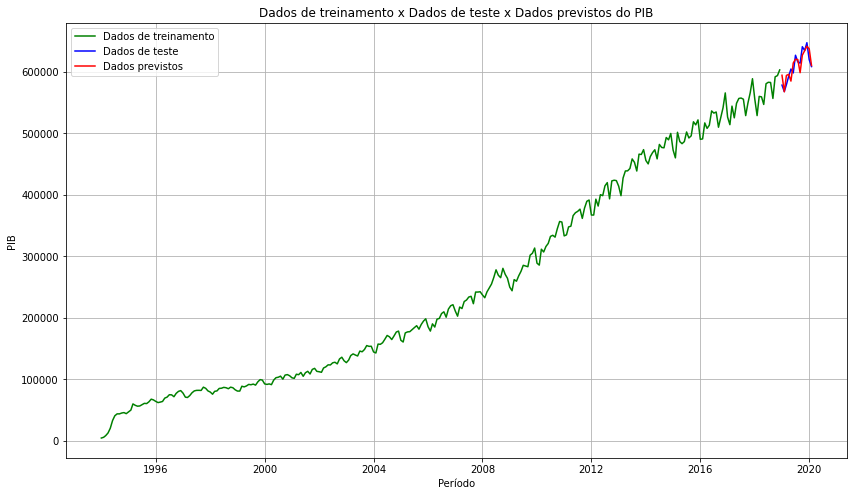

In [ ]:
#Plotagem dos dados de treinamento, teste e previsão
plt.figure(figsize=(14,8))
plt.plot(dfpib_train_lstm.index, dfpib_train_lstm, color='green', label = 'Dados de treinamento')
plt.plot(dfpib_test_lstm.index, dfpib_test_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(dfpib_test_lstm.index, lstm_predictions, color = 'red', label = 'Dados previstos')
plt.title('Dados de treinamento x Dados de teste x Dados previstos do PIB')
plt.xlabel('Período')
plt.ylabel('PIB')
plt.legend()
plt.grid(True)
plt.show()

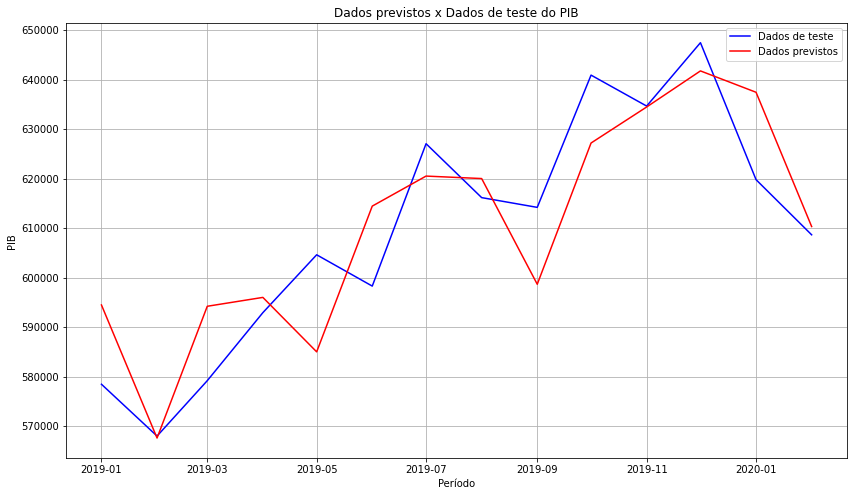

In [ ]:
#Plotagem dos dados de teste e dados previstos
plt.figure(figsize=(14,8))
plt.plot(dfpib_test_lstm.index, test_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(dfpib_test_lstm.index, lstm_predictions, color = 'red', label = 'Dados previstos')
plt.title('Dados previstos x Dados de teste do PIB')
plt.xlabel('Período')
plt.ylabel('PIB')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAELSTMPIB = int(mean_absolute_error(dfpib_test_lstm,lstm_predictions))
MSELSTMPIB = int(mean_squared_error(dfpib_test_lstm,lstm_predictions))
RMSELSTMPIB = int(np.sqrt(mean_squared_error(dfpib_test_lstm,lstm_predictions)))


print('MSE: '+str(MSELSTMPIB))
print('MAE: '+str(MAELSTMPIB))
print('RMSE: '+str(RMSELSTMPIB))

MSE: 140868984
MAE: 9654
RMSE: 11868


## Modelo Preditivo PROPHET

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfpib_train_prophet = pd.DataFrame(dftcc['pib'].iloc[:-14])  
dfpib_test_prophet =  pd.DataFrame(dftcc['pib'].iloc[-14:])
dfpib_test_prophet

,pib
Data,
2019-01-01,578453
2019-02-01,567985
2019-03-01,579173
2019-04-01,592916
2019-05-01,604607
2019-06-01,598283
2019-07-01,627050
2019-08-01,616158
2019-09-01,614188


In [ ]:
#Renomeia as colunas 'arrec' para 'y' e 'Data' para 'ds' do conjunto de treinamento e teste
dfpib_train_prophet = pd.DataFrame({"ds": dfpib_train_prophet.index, "y": dfpib_train_prophet.pib})
dfpib_train_prophet.reset_index(drop = True, inplace = True)
dfpib_test_prophet = pd.DataFrame({"ds_test": dfpib_test_prophet.index, "y_test": dfpib_test_prophet.pib})
dfpib_test_prophet.reset_index(drop = True, inplace = True)

In [ ]:
dfpib_train_prophet.head()

,ds,y
0,1994-01-01,4563
1,1994-02-01,5793
2,1994-03-01,8520
3,1994-04-01,12829
4,1994-05-01,20504


In [ ]:
#Utiliza a biblioteca Prophet para fazer a previsão
prophet_model = Prophet()
prophet_model.fit(dfpib_train_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(41.375, 0.5, 'PIB')

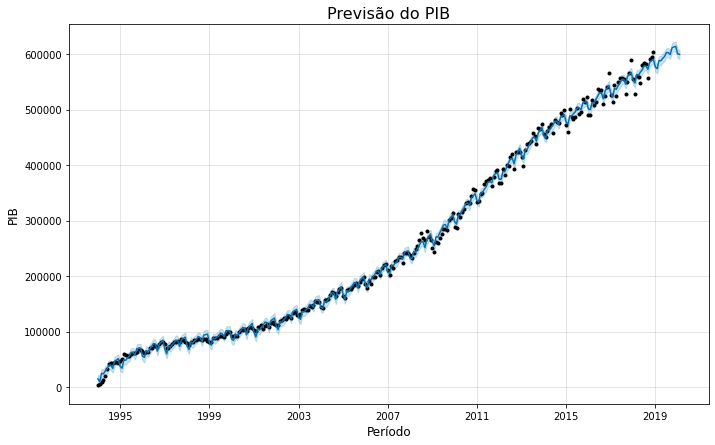

In [ ]:
#Cria datas futuras e faz a predição
prophet_forecast = prophet_model.make_future_dataframe(periods=14, freq='MS')
prophet_forecast = prophet_model.predict(prophet_forecast)

#Plotagem do gráfico de previsão
fig = prophet_model.plot(prophet_forecast)
ax1 = fig.gca()
ax1.set_title("Previsão do PIB", fontsize=16)
ax1.set_xlabel("Período", fontsize=12)
ax1.set_ylabel("PIB", fontsize=12)

In [ ]:
#Seleciona os dados previstos apenas para o período de teste
prophet_forecast = prophet_forecast[prophet_forecast['ds'] > '2018-12-01']
prophet_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
300,2019-01-01,585628.418285,568134.911584,585130.628428,585628.418285,585628.418285,-8855.620867,-8855.620867,-8855.620867,-8855.620867,-8855.620867,-8855.620867,0.0,0.0,0.0,576772.797418
301,2019-02-01,587739.767215,565165.713240,582192.040556,587739.767215,587739.767215,-14103.097244,-14103.097244,-14103.097244,-14103.097244,-14103.097244,-14103.097244,0.0,0.0,0.0,573636.669971
302,2019-03-01,589646.792055,579676.009600,596744.887703,589613.029878,589650.823413,-1355.916698,-1355.916698,-1355.916698,-1355.916698,-1355.916698,-1355.916698,0.0,0.0,0.0,588290.875358
303,2019-04-01,591758.140985,579833.998375,596150.470516,591629.075793,591836.006217,-3869.875112,-3869.875112,-3869.875112,-3869.875112,-3869.875112,-3869.875112,0.0,0.0,0.0,587888.265874
304,2019-05-01,593801.381886,584021.694400,601190.662745,593542.266757,593978.978876,-1500.576474,-1500.576474,-1500.576474,-1500.576474,-1500.576474,-1500.576474,0.0,0.0,0.0,592300.805411


In [ ]:
#Escolhe as datas ('ds' e 'ds_test') como índices
prophet_forecast.set_index(prophet_forecast['ds'], inplace=True) 
dfpib_test_prophet.set_index(dfpib_test_prophet['ds_test'], inplace=True) 
dfpib_train_prophet.set_index(dfpib_train_prophet['ds'], inplace=True) 

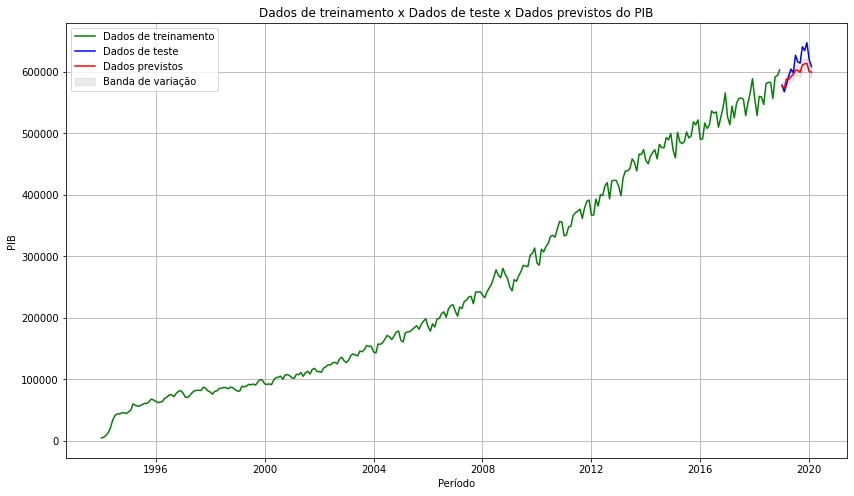

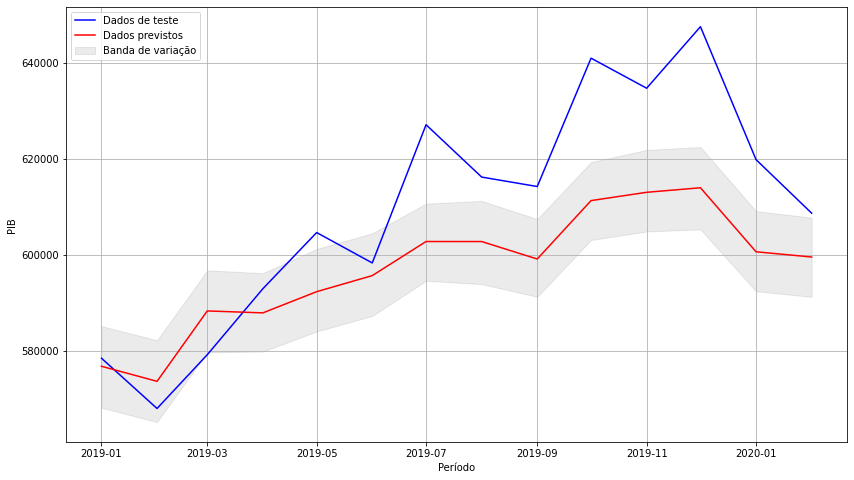

In [ ]:
#Plotagem do comparativo entre o preço previsto e o dataset
n = dfpib_train_prophet.shape[0]
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos do PIB')
plt.plot(dfpib_train_prophet['y'], 'green', label='Dados de treinamento')
plt.plot(dfpib_test_prophet['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'][-n:], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("PIB")
plt.legend()
plt.grid(True)

#Plotagem do comparativo entre o preço previsto e o preço de validação
plt.figure(figsize=(14,8))
plt.plot(dfpib_test_prophet['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("PIB")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAEPROPHETPIB = int(mean_absolute_error(dfpib_test_prophet['y_test'],prophet_forecast['yhat']))
MSEPROPHETPIB = int(mean_squared_error(dfpib_test_prophet['y_test'],prophet_forecast['yhat']))
RMSEPROPHETPIB = int(np.sqrt(mean_squared_error(dfpib_test_prophet['y_test'],prophet_forecast['yhat'])))

print('MSE: '+str(MSEPROPHETPIB))
print('MAE: '+str(MAEPROPHETPIB))
print('RMSE: '+str(RMSEPROPHETPIB))

MSE: 301714278
MAE: 14456
RMSE: 17369


## Comparativo entre os modelos

In [ ]:
#Criar dataframe de comparação entre os modelos
dfpib_comparativo = dfpib_test_arima.copy()
dfpib_comparativo['PREVISÃO_ARIMA'] = forecast_arima['Prediction']
dfpib_comparativo['PREVISÃO_PROPHET'] = prophet_forecast['yhat']
dfpib_comparativo['PREVISÃO_LSTM'] = lstm_predictions
dfpib_comparativo.head(14)

,pib,PREVISÃO_ARIMA,PREVISÃO_PROPHET,PREVISÃO_LSTM
Data,,,,
2019-01-01,578453,586173.317181,576772.797418,594470.122398
2019-02-01,567985,566177.926019,573636.669971,567585.884659
2019-03-01,579173,588991.643749,588290.875358,594206.170166
2019-04-01,592916,590304.647067,587888.265874,595997.677261
2019-05-01,604607,581960.695311,592300.805411,584997.740921
2019-06-01,598283,608057.425873,595646.863223,614443.078842
2019-07-01,627050,610883.433455,602741.567051,620508.699715
2019-08-01,616158,611620.098056,602736.315214,620010.194633
2019-09-01,614188,592864.108760,599099.183260,598652.755569


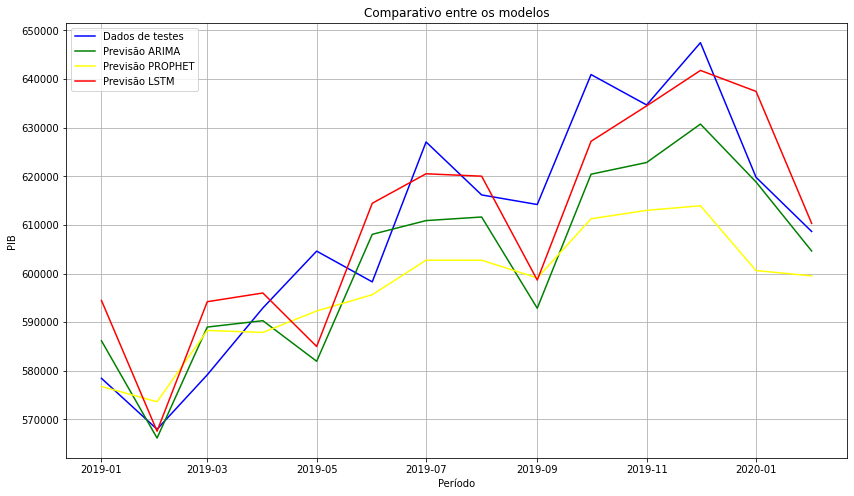

In [ ]:
# Plotagem do comparativo entre os modelos
plt.figure(figsize=(14,8))
plt.plot(dfpib_comparativo.index, dfpib_comparativo["pib"], color='blue', label = 'Dados de testes')
plt.plot(dfpib_comparativo.index, dfpib_comparativo["PREVISÃO_ARIMA"], color = 'green', label = 'Previsão ARIMA')
plt.plot(dfpib_comparativo.index, dfpib_comparativo["PREVISÃO_PROPHET"], color = 'yellow', label = 'Previsão PROPHET')
plt.plot(dfpib_comparativo.index, dfpib_comparativo["PREVISÃO_LSTM"], color = 'red', label = 'Previsão LSTM')
plt.title('Comparativo entre os modelos')
plt.xlabel('Período')
plt.ylabel('PIB')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Comparativo dos erros

dfpib_erro = pd.DataFrame({"Modelos" : ["ARIMA", "LSTM", "Prophet"]})
dfpib_erro['MAE'] = [MAEARIMAPIB, MAELSTMPIB, MAEPROPHETPIB]
dfpib_erro['MSE'] = [MSEARIMAPIB, MSELSTMPIB, MSEPROPHETPIB]
dfpib_erro['RMSE'] = [RMSEARIMAPIB, RMSELSTMPIB, RMSEPROPHETPIB]
dfpib_erro = dfpib_erro.sort_values('MAE')
dfpib_erro.set_index('Modelos', inplace=True)
dfpib_erro.head()

,MAE,MSE,RMSE
Modelos,,,
LSTM,9654,140868984,11868
ARIMA,10744,169126237,13004
Prophet,14456,301714278,17369


## **MODELOS PREDITIVOS DAS IMPORTAÇÕES**

## Modelo preditivo ARIMA

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfimp_train_arima = pd.DataFrame(dftcc['imp'].iloc[:-14])  
dfimp_test_arima =  pd.DataFrame(dftcc['imp'].iloc[-14:])
dfimp_test_arima

,imp
Data,
2019-01-01,16387829960
2019-02-01,12621762837
2019-03-01,13132998803
2019-04-01,13628618723
2019-05-01,14968051867
2019-06-01,13028629358
2019-07-01,17759476963
2019-08-01,15569921736
2019-09-01,16495171374


In [ ]:
# Utilização do auto-arima para identificar o melhor modelo de forma automática
modelARIMAIMP = auto_arima(dfimp_train_arima['imp'], test='adf', trace=True, seasonal= True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=13288.443, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13391.154, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=13317.724, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13316.730, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13389.411, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=13298.393, Time=0.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=13291.147, Time=0.56 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=13288.373, Time=2.37 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=13292.278, Time=1.31 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=13286.798, Time=3.28 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=13286.860, Time=2.12 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=13313.486, Time=3.69 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=13293.535, Time=3.26 sec
 ARIMA(3,1,2)(2,0,2)[12] intercept   : AIC=13272.348, Time=6.13 sec
 ARIM

In [ ]:
print(modelARIMAIMP.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  300
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -6620.781
Date:                              Thu, 18 Mar 2021   AIC                          13267.562
Time:                                      00:59:18   BIC                          13315.667
Sample:                                           0   HQIC                         13286.816
                                              - 300                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.758e+07   2.12e-10   2.71e+17      0.000    5.76e+07    5.76e+07
ar.L1         -0.18

In [ ]:
# Treinamento do modelo
modelARIMAIMP.fit(dfimp_train_arima['imp'])

ARIMA(maxiter=50, method='lbfgs', order=(5, 1, 4), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
#Faz a predição 
forecast_arima = modelARIMAIMP.predict(n_periods=len(dfimp_test_arima['imp']))
forecast_arima = pd.DataFrame(forecast_arima, index = dfimp_test_arima.index,columns=['Prediction'])
conf_int = modelARIMAIMP.predict(len(dfimp_test_arima['imp']), return_conf_int=True, alpha = 0.05) #Pega o intervalo de confiança

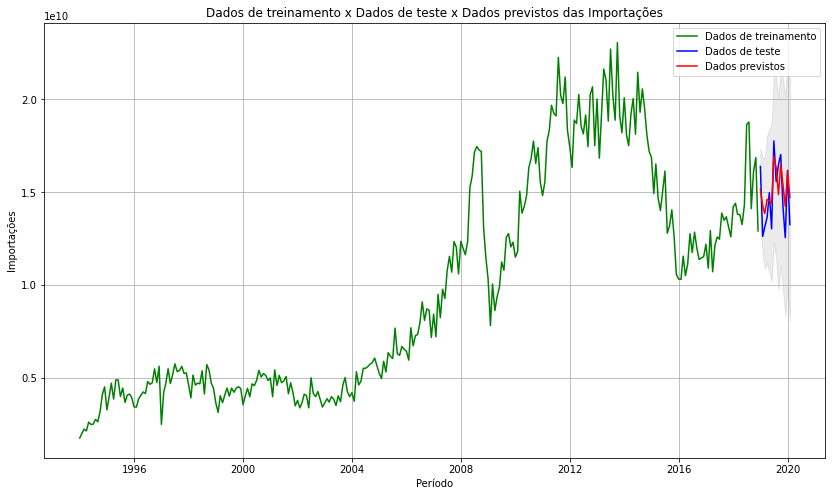

In [ ]:
#Plotagem dos dados de treinamento, teste e previsão
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos das Importações')
plt.plot(dfimp_train_arima['imp'], color='green', label = 'Dados de treinamento')
plt.plot(dfimp_test_arima['imp'], color = 'blue', label = 'Dados de teste')
plt.fill_between(dfimp_test_arima.index, conf_int[1][:,0], conf_int[1][:,1], 
                 color='k', alpha=.08)
plt.plot(forecast_arima['Prediction'], color = 'red', label = 'Dados previstos')
plt.xlabel('Período')
plt.ylabel('Importações')
plt.legend()
plt.grid(True)
plt.show()

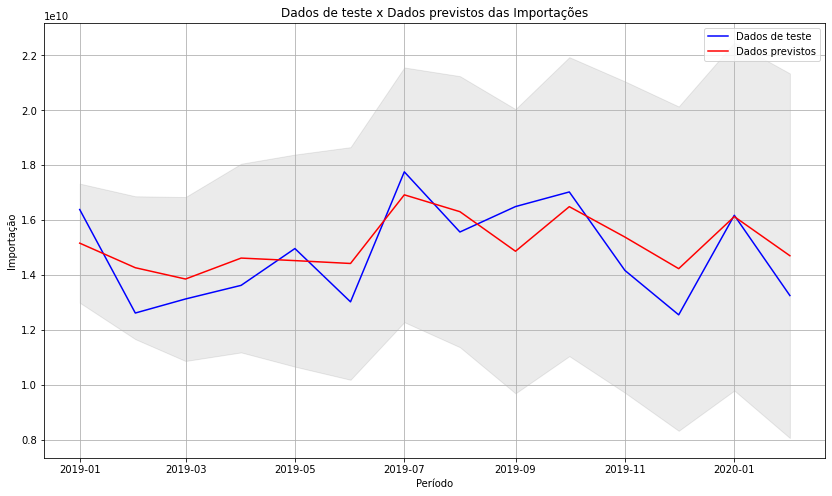

In [ ]:
#Plotagem dos dados de teste e previsão
plt.figure(figsize=(14,8))
plt.title('Dados de teste x Dados previstos das Importações')
plt.plot(dfimp_test_arima['imp'], color = 'blue', label = 'Dados de teste')
plt.fill_between(dfimp_test_arima.index, conf_int[1][:,0], conf_int[1][:,1], 
                 color='k', alpha=.08)
plt.plot(forecast_arima['Prediction'], color = 'red', label = 'Dados previstos')
plt.xlabel('Período')
plt.ylabel('Importação')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAEARIMAIMP = int(mean_absolute_error(dfimp_test_arima['imp'], forecast_arima['Prediction']))
MSEARIMAIMP = int(mean_squared_error(dfimp_test_arima['imp'], forecast_arima['Prediction']))
RMSEARIMAIMP = int(math.sqrt(mean_squared_error(dfimp_test_arima['imp'], forecast_arima['Prediction'])))


print('MSE: '+str(MSEARIMAIMP))
print('MAE: '+str(MAEARIMAIMP))
print('RMSE: '+str(RMSEARIMAIMP))

MSE: 1317426623809606912
MAE: 1039653223
RMSE: 1147792064


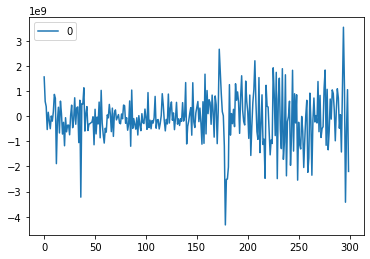

In [ ]:
#Plotagem dos resíduos
residuals = pd.DataFrame(modelARIMAIMP.resid())
residuals.plot()

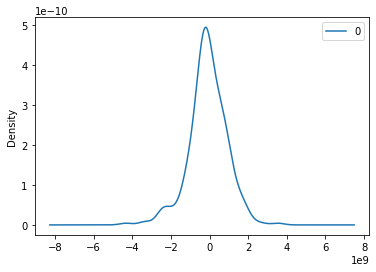

                  0
count  3.000000e+02
mean  -8.941475e+07
std    9.810986e+08
min   -4.327985e+09
25%   -5.557566e+08
50%   -1.227377e+08
75%    5.441502e+08
max    3.547896e+09


In [ ]:
#Plotagem da densidade dos resíduos
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Modelo Preditivo LSTM

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfimp_train_lstm = pd.DataFrame(dftcc['imp'].iloc[:-14])  
dfimp_test_lstm =  pd.DataFrame(dftcc['imp'].iloc[-14:])
dfimp_test_lstm

,imp
Data,
2019-01-01,16387829960
2019-02-01,12621762837
2019-03-01,13132998803
2019-04-01,13628618723
2019-05-01,14968051867
2019-06-01,13028629358
2019-07-01,17759476963
2019-08-01,15569921736
2019-09-01,16495171374


In [ ]:
#Normalização dos dados
scaler = MinMaxScaler()
train_lstm = dfimp_train_lstm.iloc[:,0:1].values
test_lstm = dfimp_test_lstm.iloc[:,0:1].values
scaler.fit(train_lstm)
scaled_train_data = scaler.transform(train_lstm)
scaled_test_data = scaler.transform(test_lstm)

In [ ]:
# Gerar um objeto de série temporal

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
#Criação da LSTM utilizando a biblioteca Keras

lstm_model = Sequential()
lstm_model.add(LSTM(300, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=300)

Epoch 1/300
288/288 [==============================] - 6s 16ms/step - loss: 0.0387
Epoch 2/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0076
Epoch 3/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0073
Epoch 4/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0048
Epoch 5/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0054
Epoch 6/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0064
Epoch 7/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0043
Epoch 8/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0053
Epoch 9/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0039
Epoch 10/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0035
Epoch 11/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0048
Epoch 12/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0038
E

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_lstm)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

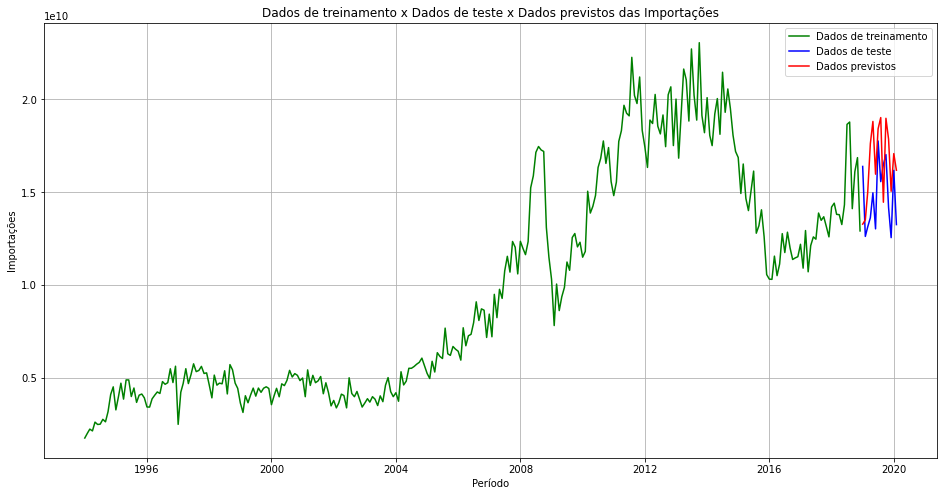

In [ ]:
#Plotagem dos dados de treinamento, teste e previsão
plt.figure(figsize=(16,8))
plt.plot(dfimp_train_lstm.index, dfimp_train_lstm, color='green', label = 'Dados de treinamento')
plt.plot(dfimp_test_lstm.index, dfimp_test_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(dfimp_test_lstm.index, lstm_predictions, color = 'red', label = 'Dados previstos')
plt.title('Dados de treinamento x Dados de teste x Dados previstos das Importações')
plt.xlabel('Período')
plt.ylabel('Importações')
plt.legend()
plt.grid(True)
plt.show()

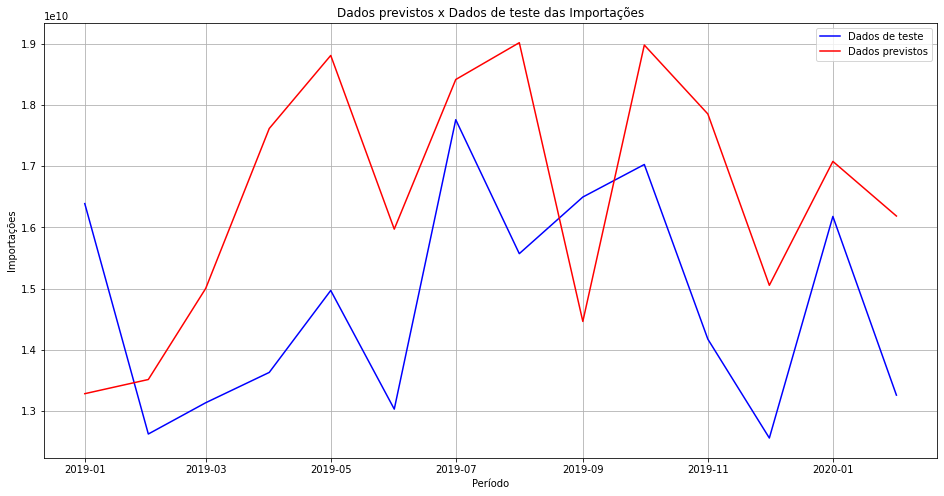

In [ ]:
#Plotagem dos dados de teste e dados previstos
plt.figure(figsize=(16,8))
plt.plot(dfimp_test_lstm.index, test_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(dfimp_test_lstm.index, lstm_predictions, color = 'red', label = 'Dados previstos')
plt.title('Dados previstos x Dados de teste das Importações')
plt.xlabel('Período')
plt.ylabel('Importações')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAELSTMIMP = int(mean_absolute_error(dfimp_test_lstm,lstm_predictions))
MSELSTMIMP = int(mean_squared_error(dfimp_test_lstm,lstm_predictions))
RMSELSTMIMP = int(np.sqrt(mean_squared_error(dfimp_test_lstm,lstm_predictions)))

print('MSE: '+str(MSELSTMIMP))
print('MAE: '+str(MAELSTMIMP))
print('RMSE: '+str(RMSELSTMIMP))

MSE: 7334098141050380288
MAE: 2480891782
RMSE: 2708154009


## Modelo Preditivo PROPHET

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfimp_train_prophet = pd.DataFrame(dftcc['imp'].iloc[:-14])  
dfimp_test_prophet =  pd.DataFrame(dftcc['imp'].iloc[-14:])
dfimp_test_prophet

,imp
Data,
2019-01-01,16387829960
2019-02-01,12621762837
2019-03-01,13132998803
2019-04-01,13628618723
2019-05-01,14968051867
2019-06-01,13028629358
2019-07-01,17759476963
2019-08-01,15569921736
2019-09-01,16495171374


In [ ]:
#Renomeia as colunas 'arrec' para 'y' e 'Data' para 'ds' do conjunto de treinamento e teste
dfimp_train_prophet = pd.DataFrame({"ds": dfimp_train_prophet.index, "y": dfimp_train_prophet.imp})
dfimp_train_prophet.reset_index(drop = True, inplace = True)
dfimp_test_prophet = pd.DataFrame({"ds_test": dfimp_test_prophet.index, "y_test": dfimp_test_prophet.imp})
dfimp_test_prophet.reset_index(drop = True, inplace = True)

In [ ]:
dfimp_train_prophet.head()

,ds,y
0,1994-01-01,1768675231
1,1994-02-01,2030100974
2,1994-03-01,2248937491
3,1994-04-01,2151981505
4,1994-05-01,2624852192


In [ ]:
dfimp_test_prophet.head()

,ds_test,y_test
0,2019-01-01,16387829960
1,2019-02-01,12621762837
2,2019-03-01,13132998803
3,2019-04-01,13628618723
4,2019-05-01,14968051867


In [ ]:
#Utiliza a biblioteca Prophet para fazer a previsão
prophet_model = Prophet()
prophet_model.fit(dfimp_train_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(63.0, 0.5, 'Importações')

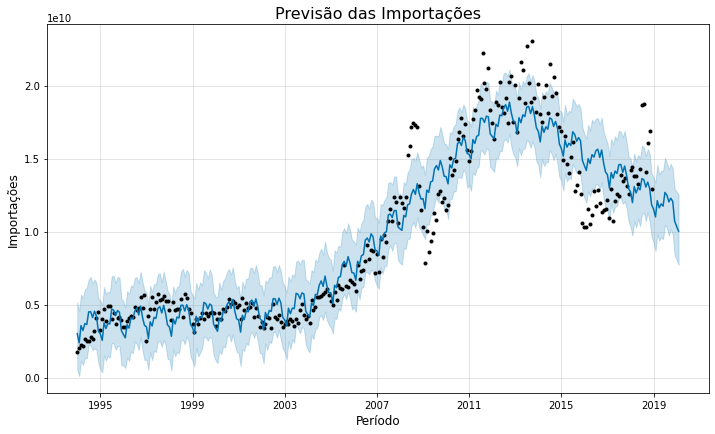

In [ ]:
#Cria datas futuras e faz a predição
prophet_forecast = prophet_model.make_future_dataframe(periods=14, freq='MS')
prophet_forecast = prophet_model.predict(prophet_forecast)

#Plotagem do gráfico de previsão
fig = prophet_model.plot(prophet_forecast)
ax1 = fig.gca()
ax1.set_title("Previsão das Importações", fontsize=16)
ax1.set_xlabel("Período", fontsize=12)
ax1.set_ylabel("Importações", fontsize=12)

In [ ]:
#Seleciona os dados previstos apenas para o período de teste
prophet_forecast = prophet_forecast[prophet_forecast['ds'] > '2018-12-01']
prophet_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
300,2019-01-01,1.233547e+10,9.271638e+09,1.370364e+10,1.233547e+10,1.233547e+10,-7.945165e+08,-7.945165e+08,-7.945165e+08,-7.945165e+08,-7.945165e+08,-7.945165e+08,0.0,0.0,0.0,1.154095e+10
301,2019-02-01,1.224730e+10,8.654058e+09,1.337892e+10,1.224730e+10,1.224730e+10,-1.237716e+09,-1.237716e+09,-1.237716e+09,-1.237716e+09,-1.237716e+09,-1.237716e+09,0.0,0.0,0.0,1.100959e+10
302,2019-03-01,1.216767e+10,9.848820e+09,1.459269e+10,1.216504e+10,1.216770e+10,-4.375260e+07,-4.375260e+07,-4.375260e+07,-4.375260e+07,-4.375260e+07,-4.375260e+07,0.0,0.0,0.0,1.212391e+10
303,2019-04-01,1.207950e+10,9.385620e+09,1.390037e+10,1.207010e+10,1.208352e+10,-4.444577e+08,-4.444577e+08,-4.444577e+08,-4.444577e+08,-4.444577e+08,-4.444577e+08,0.0,0.0,0.0,1.163504e+10
304,2019-05-01,1.199418e+10,9.615957e+09,1.416650e+10,1.197534e+10,1.200348e+10,-9.571554e+07,-9.571554e+07,-9.571554e+07,-9.571554e+07,-9.571554e+07,-9.571554e+07,0.0,0.0,0.0,1.189846e+10


In [ ]:
#Escolhe as datas ('ds' e 'ds_test') como índices
prophet_forecast.set_index(prophet_forecast['ds'], inplace=True) 
dfimp_test_prophet.set_index(dfimp_test_prophet['ds_test'], inplace=True) 
dfimp_train_prophet.set_index(dfimp_train_prophet['ds'], inplace=True) 

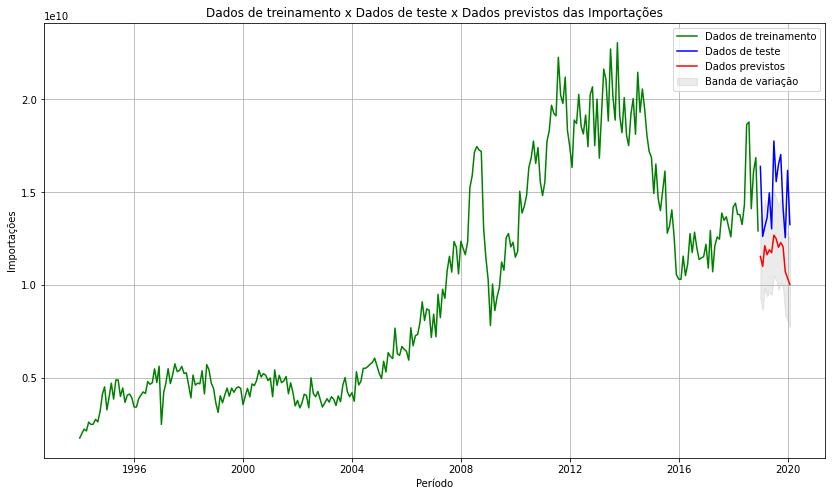

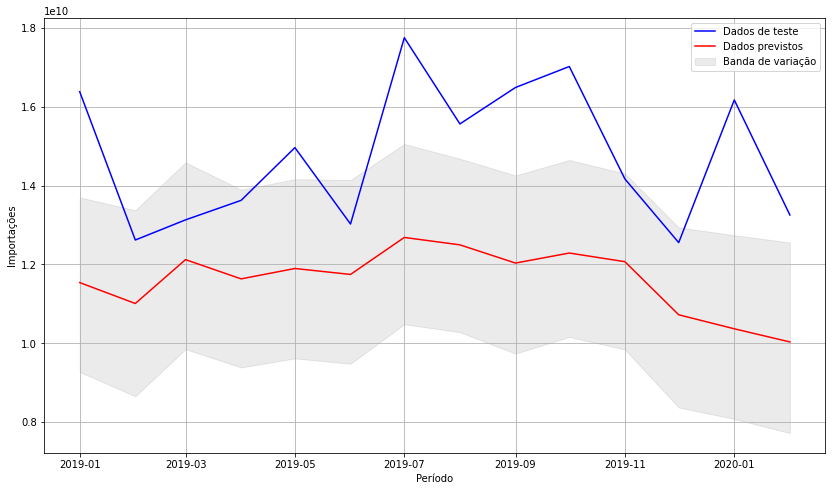

In [ ]:
#Plotagem do comparativo entre o preço previsto e o dataset
n = dfimp_train_prophet.shape[0]
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos das Importações')
plt.plot(dfimp_train_prophet['y'], 'green', label='Dados de treinamento')
plt.plot(dfimp_test_prophet['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'][-n:], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Importações")
plt.legend()
plt.grid(True)

#Plotagem do comparativo entre o preço previsto e o preço de validação
plt.figure(figsize=(14,8))
plt.plot(dfimp_test_prophet['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Importações")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAEPROPHETIMP = int(mean_absolute_error(dfimp_test_prophet['y_test'],prophet_forecast['yhat']))
MSEPROPHETIMP = int(mean_squared_error(dfimp_test_prophet['y_test'],prophet_forecast['yhat']))
RMSEPROPHETIMP = int(np.sqrt(mean_squared_error(dfimp_test_prophet['y_test'],prophet_forecast['yhat'])))


print('MSE: '+str(MSEPROPHETIMP))
print('MAE: '+str(MAEPROPHETIMP))
print('RMSE: '+str(RMSEPROPHETIMP))

MSE: 12253513240758245376
MAE: 3151316933
RMSE: 3500501855


## Comparativo entre os modelos

In [ ]:
#Criar dataframe de comparação entre os modelos
dfimp_comparativo = dfimp_test_arima.copy()
dfimp_comparativo['PREVISÃO_ARIMA'] = forecast_arima['Prediction']
dfimp_comparativo['PREVISÃO_PROPHET'] = prophet_forecast['yhat']
dfimp_comparativo['PREVISÃO_LSTM'] = lstm_predictions
dfimp_comparativo.head(14)

,imp,PREVISÃO_ARIMA,PREVISÃO_PROPHET,PREVISÃO_LSTM
Data,,,,
2019-01-01,16387829960,1.516435e+10,1.154095e+10,1.328103e+10
2019-02-01,12621762837,1.427044e+10,1.100959e+10,1.351274e+10
2019-03-01,13132998803,1.385894e+10,1.212391e+10,1.500150e+10
2019-04-01,13628618723,1.462098e+10,1.163504e+10,1.761545e+10
2019-05-01,14968051867,1.452883e+10,1.189846e+10,1.880972e+10
2019-06-01,13028629358,1.442475e+10,1.174755e+10,1.597095e+10
2019-07-01,17759476963,1.692262e+10,1.268689e+10,1.841636e+10
2019-08-01,15569921736,1.630953e+10,1.249907e+10,1.901833e+10
2019-09-01,16495171374,1.486988e+10,1.203635e+10,1.446199e+10


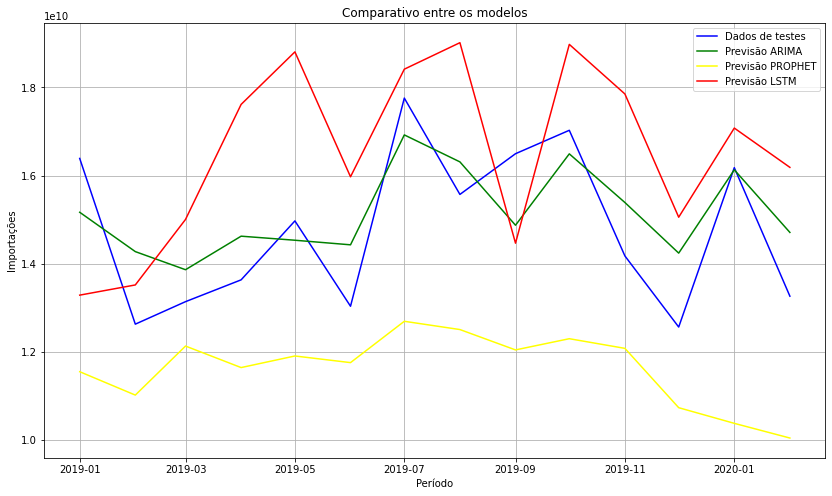

In [ ]:
# Plotagem do comparativo entre os modelos
plt.figure(figsize=(14,8))
plt.plot(dfimp_comparativo.index, dfimp_comparativo["imp"], color='blue', label = 'Dados de testes')
plt.plot(dfimp_comparativo.index, dfimp_comparativo["PREVISÃO_ARIMA"], color = 'green', label = 'Previsão ARIMA')
plt.plot(dfimp_comparativo.index, dfimp_comparativo["PREVISÃO_PROPHET"], color = 'yellow', label = 'Previsão PROPHET')
plt.plot(dfimp_comparativo.index, dfimp_comparativo["PREVISÃO_LSTM"], color = 'red', label = 'Previsão LSTM')
plt.title('Comparativo entre os modelos')
plt.xlabel('Período')
plt.ylabel('Importações')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Comparativo dos erros
dfimp_erro = pd.DataFrame({"Modelos" : ["ARIMA", "LSTM", "Prophet"]})
dfimp_erro['MAE'] = [MAEARIMAIMP, MAELSTMIMP, MAEPROPHETIMP]
dfimp_erro['MSE'] = [MSEARIMAIMP, MSELSTMIMP, MSEPROPHETIMP]
dfimp_erro['RMSE'] = [RMSEARIMAIMP, RMSELSTMIMP, RMSEPROPHETIMP]
dfimp_erro = dfimp_erro.sort_values('MAE')
dfimp_erro.set_index('Modelos', inplace=True)
dfimp_erro.head()

,MAE,MSE,RMSE
Modelos,,,
ARIMA,1039653223,1317426623809606912,1147792064
LSTM,2480891782,7334098141050380288,2708154009
Prophet,3151316933,12253513240758245376,3500501855


## **MODELOS PREDITIVOS DAS EXPORTAÇÕES**

## Modelo preditivo ARIMA

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfexp_train_arima = pd.DataFrame(dftcc['exp'].iloc[:-14])  
dfexp_test_arima =  pd.DataFrame(dftcc['exp'].iloc[-14:])
dfexp_test_arima

,exp
Data,
2019-01-01,18001907016
2019-02-01,15737375000
2019-03-01,17428698480
2019-04-01,19281734438
2019-05-01,20592409187
2019-06-01,18406010533
2019-07-01,20150883169
2019-08-01,19669525248
2019-09-01,20298407777


In [ ]:
# Utilização do auto-arima para identificar o melhor modelo de forma automática
modelARIMAEXP = auto_arima(dfexp_train_arima['exp'], test='adf', trace=True, seasonal= True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=13376.495, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13503.918, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=13398.309, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13428.496, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13502.307, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=13428.270, Time=0.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=13396.379, Time=0.56 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=13372.295, Time=6.37 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=13374.066, Time=4.39 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=13373.871, Time=6.51 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=13373.066, Time=5.28 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=13376.260, Time=2.06 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=13358.930, Time=6.08 sec
 ARIMA(3,1,

In [ ]:
print(modelARIMAEXP.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  300
Model:             SARIMAX(5, 1, 4)x(1, 0, [1, 2], 12)   Log Likelihood               -6652.015
Date:                                 Fri, 19 Mar 2021   AIC                          13330.030
Time:                                         00:44:15   BIC                          13378.135
Sample:                                              0   HQIC                         13349.284
                                                 - 300                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2226      0.130      1.718      0.086      -0.031       0

In [ ]:
# Treinamento do modelo
modelARIMAEXP.fit(dfexp_train_arima['exp'])

ARIMA(maxiter=50, method='lbfgs', order=(5, 1, 4), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
#Faz a predição 
forecast_arima = modelARIMAEXP.predict(n_periods=len(dfexp_test_arima['exp']))
forecast_arima = pd.DataFrame(forecast_arima, index = dfexp_test_arima.index,columns=['Prediction'])
conf_int = modelARIMAEXP.predict(len(dfexp_test_arima['exp']), return_conf_int=True, alpha = 0.05) #Pega o intervalo de confiança

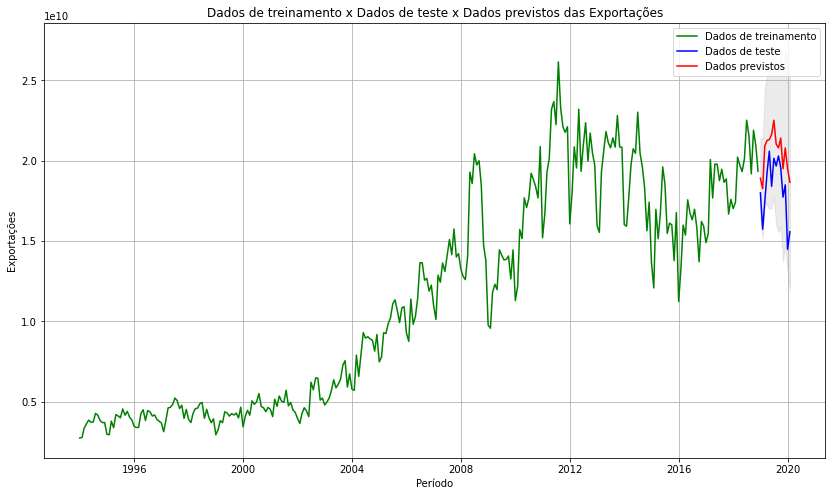

In [ ]:
#Plotagem dos dados de treinamento, teste e previsão
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos das Exportações')
plt.plot(dfexp_train_arima['exp'], color='green', label = 'Dados de treinamento')
plt.plot(dfexp_test_arima['exp'], color = 'blue', label = 'Dados de teste')
plt.fill_between(dfexp_test_arima.index, conf_int[1][:,0], conf_int[1][:,1], 
                 color='k', alpha=.08)
plt.plot(forecast_arima['Prediction'], color = 'red', label = 'Dados previstos')
plt.xlabel('Período')
plt.ylabel('Exportações')
plt.legend()
plt.grid(True)
plt.show()

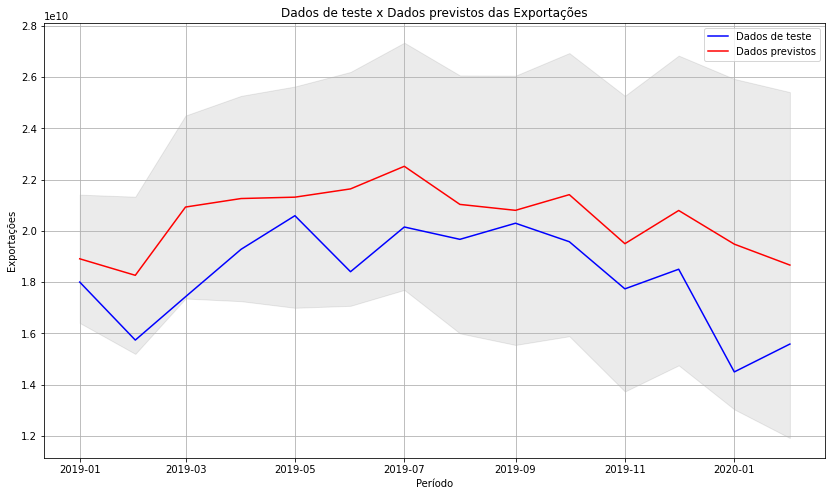

In [ ]:
#Plotagem dos dados de teste e previsão
plt.figure(figsize=(14,8))
plt.title('Dados de teste x Dados previstos das Exportações')
plt.plot(dfexp_test_arima['exp'], color = 'blue', label = 'Dados de teste')
plt.fill_between(dfexp_test_arima.index, conf_int[1][:,0], conf_int[1][:,1], 
                 color='k', alpha=.08)
plt.plot(forecast_arima['Prediction'], color = 'red', label = 'Dados previstos')
plt.xlabel('Período')
plt.ylabel('Exportações')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAEARIMAEXP = int(mean_absolute_error(dfexp_test_arima['exp'], forecast_arima['Prediction']))
MSEARIMAEXP = int(mean_squared_error(dfexp_test_arima['exp'], forecast_arima['Prediction']))
RMSEARIMAEXP = int(math.sqrt(mean_squared_error(dfexp_test_arima['exp'], forecast_arima['Prediction'])))



print('MSE: '+str(MSEARIMAEXP))
print('MAE: '+str(MAEARIMAEXP))
print('RMSE: '+str(RMSEARIMAEXP))

MSE: 6300629551737437184
MAE: 2219464960
RMSE: 2510105486


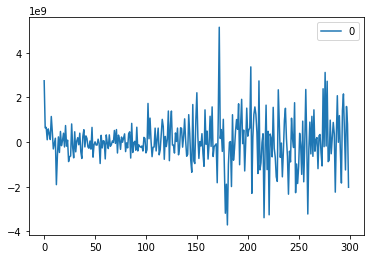

In [ ]:
#Plotagem dos resíduos
residuals = pd.DataFrame(modelARIMAEXP.resid())
residuals.plot()

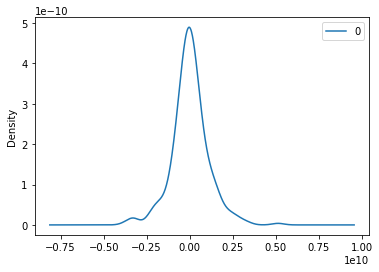

                  0
count  3.000000e+02
mean   3.191088e+07
std    1.073227e+09
min   -3.707042e+09
25%   -4.678949e+08
50%   -6.291056e+06
75%    5.262095e+08
max    5.144024e+09


In [ ]:
#Plotagem da densidade dos resíduos
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Modelo Preditivo LSTM

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfexp_train_lstm = pd.DataFrame(dftcc['exp'].iloc[:-14])  
dfexp_test_lstm =  pd.DataFrame(dftcc['exp'].iloc[-14:])
dfexp_test_lstm

,exp
Data,
2019-01-01,18001907016
2019-02-01,15737375000
2019-03-01,17428698480
2019-04-01,19281734438
2019-05-01,20592409187
2019-06-01,18406010533
2019-07-01,20150883169
2019-08-01,19669525248
2019-09-01,20298407777


In [ ]:
#Normalização dos dados
scaler = MinMaxScaler()
train_lstm = dfexp_train_lstm.iloc[:,0:1].values
test_lstm = dfexp_test_lstm.iloc[:,0:1].values
scaler.fit(train_lstm)
scaled_train_data = scaler.transform(train_lstm)
scaled_test_data = scaler.transform(test_lstm)

In [ ]:
# Gerar um objeto de série temporal

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
#Criação da LSTM utilizando a biblioteca Keras

lstm_model = Sequential()
lstm_model.add(LSTM(300, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               362400    
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=300)

Epoch 1/300
288/288 [==============================] - 6s 15ms/step - loss: 0.0328
Epoch 2/300
288/288 [==============================] - 4s 15ms/step - loss: 0.0114
Epoch 3/300
288/288 [==============================] - 4s 15ms/step - loss: 0.0086
Epoch 4/300
288/288 [==============================] - 4s 15ms/step - loss: 0.0114
Epoch 5/300
288/288 [==============================] - 4s 15ms/step - loss: 0.0056
Epoch 6/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0075
Epoch 7/300
288/288 [==============================] - 4s 16ms/step - loss: 0.0055
Epoch 8/300
288/288 [==============================] - 4s 16ms/step - loss: 0.0064
Epoch 9/300
288/288 [==============================] - 5s 16ms/step - loss: 0.0058
Epoch 10/300
288/288 [==============================] - 4s 16ms/step - loss: 0.0053
Epoch 11/300
288/288 [==============================] - 4s 16ms/step - loss: 0.0048
Epoch 12/300
288/288 [==============================] - 4s 16ms/step - loss: 0.0046
E

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_lstm)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

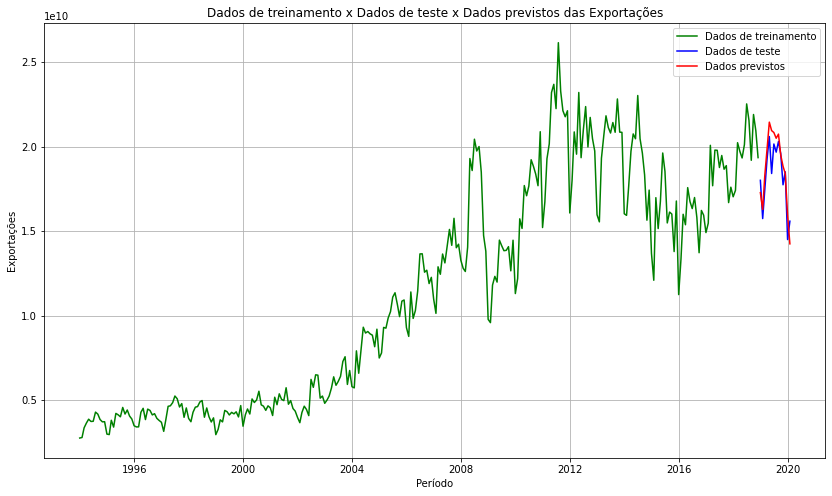

In [ ]:
#Plotagem dos dados de treinamento, teste e previsão
plt.figure(figsize=(14,8))
plt.plot(dfexp_train_lstm.index, dfexp_train_lstm, color='green', label = 'Dados de treinamento')
plt.plot(dfexp_test_lstm.index, dfexp_test_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(dfexp_test_lstm.index, lstm_predictions, color = 'red', label = 'Dados previstos')
plt.title('Dados de treinamento x Dados de teste x Dados previstos das Exportações')
plt.xlabel('Período')
plt.ylabel('Exportações')
plt.legend()
plt.grid(True)
plt.show()

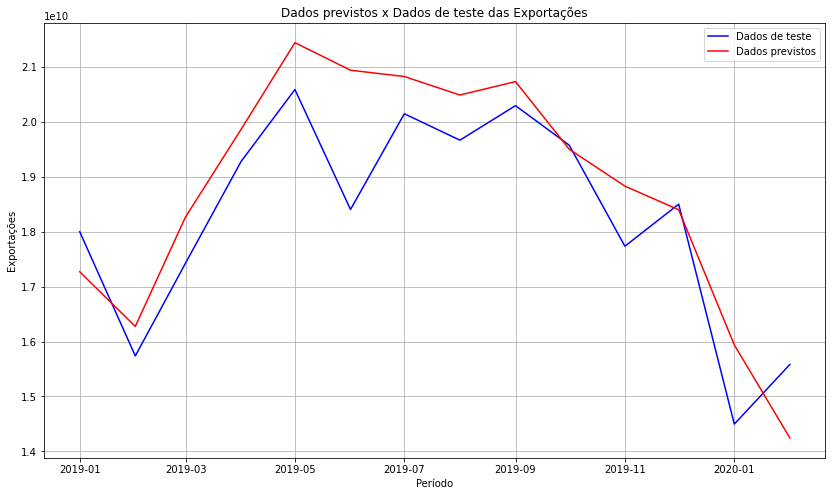

In [ ]:
#Plotagem dos dados de teste e dados previstos
plt.figure(figsize=(14,8))
plt.plot(dfexp_test_lstm.index, test_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(dfexp_test_lstm.index, lstm_predictions, color = 'red', label = 'Dados previstos')
plt.title('Dados previstos x Dados de teste das Exportações')
plt.xlabel('Período')
plt.ylabel('Exportações')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAELSTMEXP = int(mean_absolute_error(dfexp_test_lstm,lstm_predictions))
MSELSTMEXP = int(mean_squared_error(dfexp_test_lstm,lstm_predictions))
RMSELSTMEXP = int(np.sqrt(mean_squared_error(dfexp_test_lstm,lstm_predictions)))


print('MSE: '+str(MSELSTMEXP))
print('MAE: '+str(MAELSTMEXP))
print('RMSE: '+str(RMSELSTMEXP))

MSE: 1105582864471535360
MAE: 863139976
RMSE: 1051467005


## Modelo Preditivo PROPHET

In [ ]:
# Definição do conjunto de treinamento e do conjunto de teste
dfexp_train_prophet = pd.DataFrame(dftcc['exp'].iloc[:-14])  
dfexp_test_prophet =  pd.DataFrame(dftcc['exp'].iloc[-14:])
dfexp_test_prophet

,exp
Data,
2019-01-01,18001907016
2019-02-01,15737375000
2019-03-01,17428698480
2019-04-01,19281734438
2019-05-01,20592409187
2019-06-01,18406010533
2019-07-01,20150883169
2019-08-01,19669525248
2019-09-01,20298407777


In [ ]:
#Renomeia as colunas 'arrec' para 'y' e 'Data' para 'ds' do conjunto de treinamento e teste
dfexp_train_prophet = pd.DataFrame({"ds": dfexp_train_prophet.index, "y": dfexp_train_prophet.exp})
dfexp_train_prophet.reset_index(drop = True, inplace = True)
dfexp_test_prophet = pd.DataFrame({"ds_test": dfexp_test_prophet.index, "y_test": dfexp_test_prophet.exp})
dfexp_test_prophet.reset_index(drop = True, inplace = True)

In [ ]:
dfexp_train_prophet.head()

,ds,y
0,1994-01-01,2747187653
1,1994-02-01,2778288879
2,1994-03-01,3350391558
3,1994-04-01,3634841763
4,1994-05-01,3862059965


In [ ]:
#Utiliza a biblioteca Prophet para fazer a previsão
prophet_model = Prophet()
prophet_model.fit(dfexp_train_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(63.0, 0.5, 'Exportações')

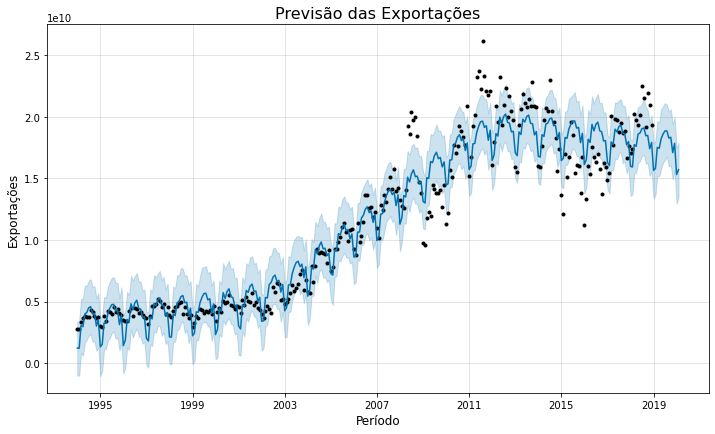

In [ ]:
#Cria datas futuras e faz a predição
prophet_forecast = prophet_model.make_future_dataframe(periods=14, freq='MS')
prophet_forecast = prophet_model.predict(prophet_forecast)

#Plotagem do gráfico de previsão
fig = prophet_model.plot(prophet_forecast)
ax1 = fig.gca()
ax1.set_title("Previsão das Exportações", fontsize=16)
ax1.set_xlabel("Período", fontsize=12)
ax1.set_ylabel("Exportações", fontsize=12)

In [ ]:
#Seleciona os dados previstos apenas para o período de teste
prophet_forecast = prophet_forecast[prophet_forecast['ds'] > '2018-12-01']
prophet_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
300,2019-01-01,1.783700e+10,1.336268e+10,1.781401e+10,1.783700e+10,1.783700e+10,-2.186143e+09,-2.186143e+09,-2.186143e+09,-2.186143e+09,-2.186143e+09,-2.186143e+09,0.0,0.0,0.0,1.565085e+10
301,2019-02-01,1.781984e+10,1.367416e+10,1.808600e+10,1.781984e+10,1.781984e+10,-2.000325e+09,-2.000325e+09,-2.000325e+09,-2.000325e+09,-2.000325e+09,-2.000325e+09,0.0,0.0,0.0,1.581952e+10
302,2019-03-01,1.780435e+10,1.519559e+10,1.967033e+10,1.780413e+10,1.780553e+10,-2.865492e+08,-2.865492e+08,-2.865492e+08,-2.865492e+08,-2.865492e+08,-2.865492e+08,0.0,0.0,0.0,1.751780e+10
303,2019-04-01,1.778720e+10,1.519000e+10,1.955856e+10,1.778283e+10,1.779161e+10,-3.404899e+08,-3.404899e+08,-3.404899e+08,-3.404899e+08,-3.404899e+08,-3.404899e+08,0.0,0.0,0.0,1.744671e+10
304,2019-05-01,1.777060e+10,1.578598e+10,2.063043e+10,1.776123e+10,1.778094e+10,4.465952e+08,4.465952e+08,4.465952e+08,4.465952e+08,4.465952e+08,4.465952e+08,0.0,0.0,0.0,1.821720e+10


In [ ]:
#Escolhe as datas ('ds' e 'ds_test') como índices
prophet_forecast.set_index(prophet_forecast['ds'], inplace=True) 
dfexp_test_prophet.set_index(dfexp_test_prophet['ds_test'], inplace=True) 
dfexp_train_prophet.set_index(dfexp_train_prophet['ds'], inplace=True) 

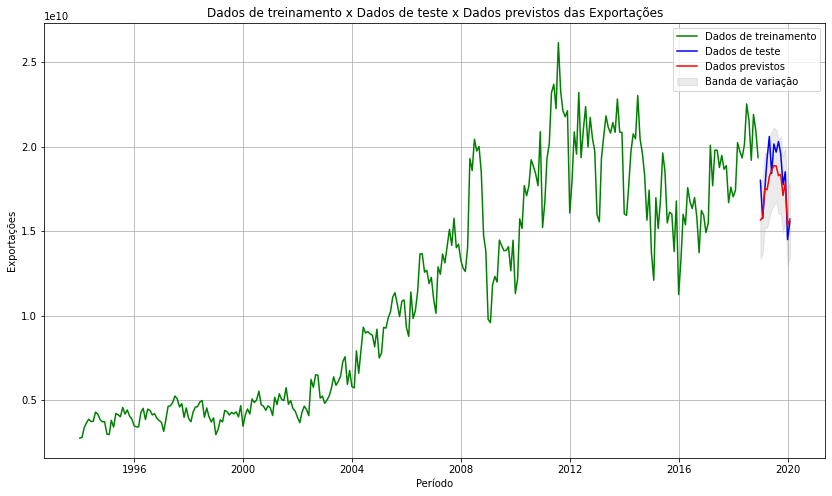

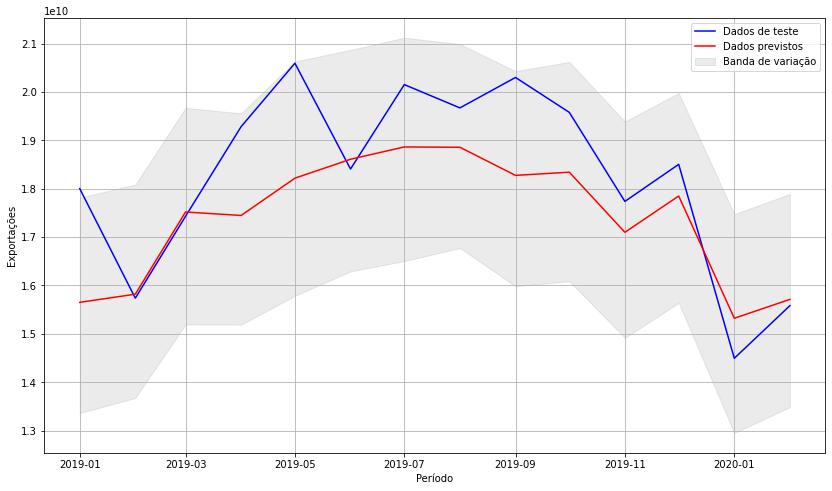

In [ ]:
#Plotagem do comparativo entre o preço previsto e o dataset
n = dfexp_train_prophet.shape[0]
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos das Exportações')
plt.plot(dfexp_train_prophet['y'], 'green', label='Dados de treinamento')
plt.plot(dfexp_test_prophet['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'][-n:], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Exportações")
plt.legend()
plt.grid(True)

#Plotagem do comparativo entre o preço previsto e o preço de validação
plt.figure(figsize=(14,8))
plt.plot(dfexp_test_prophet['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Exportações")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
MAEPROPHETEXP = int(mean_absolute_error(dfexp_test_prophet['y_test'],prophet_forecast['yhat']))
MSEPROPHETEXP = int(mean_squared_error(dfexp_test_prophet['y_test'],prophet_forecast['yhat']))
RMSEPROPHETEXP = int(np.sqrt(mean_squared_error(dfexp_test_prophet['y_test'],prophet_forecast['yhat'])))


print('MSE: '+str(MSEPROPHETEXP))
print('MAE: '+str(MAEPROPHETEXP))
print('RMSE: '+str(RMSEPROPHETEXP))

MSE: 1719510691019043328
MAE: 1039005659
RMSE: 1311301144


## Comparativo entre os modelos

In [ ]:
#Criar dataframe de comparação entre os modelos
dfexp_comparativo = dfexp_test_arima.copy()
dfexp_comparativo['PREVISÃO_ARIMA'] = forecast_arima['Prediction']
dfexp_comparativo['PREVISÃO_PROPHET'] = prophet_forecast['yhat']
dfexp_comparativo['PREVISÃO_LSTM'] = lstm_predictions
dfexp_comparativo.head(14)

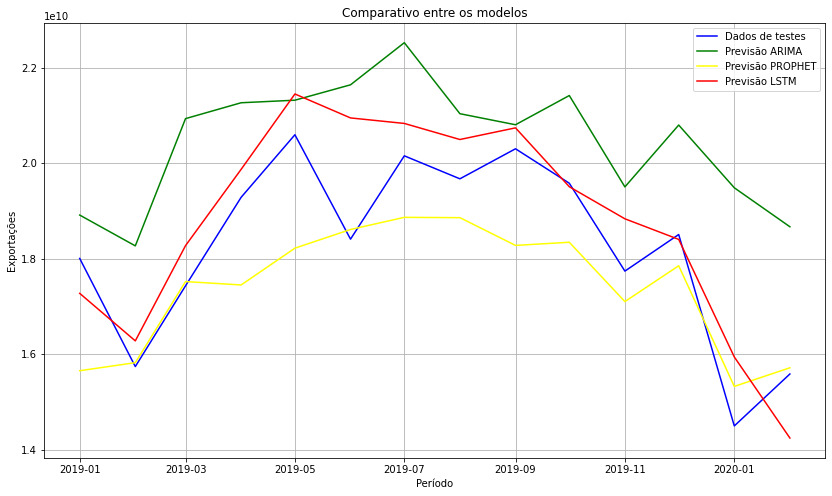

In [ ]:
# Plotagem do comparativo entre os modelos
plt.figure(figsize=(14,8))
plt.plot(dfexp_comparativo.index, dfexp_comparativo["exp"], color='blue', label = 'Dados de testes')
plt.plot(dfexp_comparativo.index, dfexp_comparativo["PREVISÃO_ARIMA"], color = 'green', label = 'Previsão ARIMA')
plt.plot(dfexp_comparativo.index, dfexp_comparativo["PREVISÃO_PROPHET"], color = 'yellow', label = 'Previsão PROPHET')
plt.plot(dfexp_comparativo.index, dfexp_comparativo["PREVISÃO_LSTM"], color = 'red', label = 'Previsão LSTM')
plt.title('Comparativo entre os modelos')
plt.xlabel('Período')
plt.ylabel('Exportações')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Comparativo dos erros
dfexp_erro = pd.DataFrame({"Modelos" : ["ARIMA", "LSTM", "Prophet"]})
dfexp_erro['MAE'] = [MAEARIMAEXP, MAELSTMEXP, MAEPROPHETEXP]
dfexp_erro['MSE'] = [MSEARIMAEXP, MSELSTMEXP, MSEPROPHETEXP]
dfexp_erro['RMSE'] = [RMSEARIMAEXP, RMSELSTMEXP, RMSEPROPHETEXP]
dfexp_erro = dfexp_erro.sort_values('MAE')
dfexp_erro.set_index('Modelos', inplace=True)
dfexp_erro.head()

,MAE,MSE,RMSE
Modelos,,,
LSTM,863139976,1105582864471535360,1051467005
Prophet,1039005659,1719510691019043328,1311301144
ARIMA,2219464960,6300629551737437184,2510105486
